In [1]:
pwd

'/home/dmarx/projects/whats-in-a-name'

In [2]:
with open('chatgpt_names.cleaned.txt') as f:
    names = f.read().split('\n')
print(len(names))

1433


In [40]:
from pathlib import Path
from diffusers import StableDiffusionPipeline
import torch
import diffusers
import time
import torch
import matplotlib.pyplot as plt
import PIL
import numpy as np
import gc
from copy import deepcopy
from collections import Counter

In [5]:
model_id = "CompVis/stable-diffusion-v1-4"

pipe = StableDiffusionPipeline.from_pretrained(
                model_id,
                revision="fp16",
                #torch_dtype=torch.float16,
                #use_auth_token=True
            ).to('cuda')

# https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0/blob/main/scheduler/scheduler_config.json
true, false, null = True, False, None
pipe.scheduler = diffusers.EulerDiscreteScheduler(
    **{
      "beta_end": 0.012,
      "beta_schedule": "scaled_linear",
      "beta_start": 0.00085,
      "interpolation_type": "linear",
      "num_train_timesteps": 1000,
      "prediction_type": "epsilon",
      "steps_offset": 1,
      "timestep_spacing": "leading",
      "trained_betas": null,
      "use_karras_sigmas": false
    }
)

# disable safety checker

#pipe.requires_safety_checker=False
def passthrough(images, *args, **kargs):
    return images, [False for _ in images]
pipe.safety_checker = passthrough

vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/dmarx/.local/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [6]:
root = Path("images-gpt-diversity")

In [ ]:
# RUN THIS CELL TO GENERATE IMAGES


kwargs = dict(
    num_inference_steps=35, #25,
    num_images_per_prompt= 12, # 16 # oh nice, i just assumed that would OOM # 8
    negative_prompt="b&w photography, collage, crowded",
)


#images_per_prompt = 24 #40
#images_per_prompt = 64
# fuck it.
images_per_name = 12

for i, name in enumerate(names):
    print((i,name))
    prompt = f"a photo of {name}, portrait photography, full color, face full frame"
    prompt = prompt.lower().strip()
    
    #prompt_clean = prompt.replace(',','')
    #outdir = root / prompt_clean.replace(' ','_')  
    outdir = root / name
    outdir.mkdir(parents=True, exist_ok=True)
    # TODO: add a jsonl metadata listing image fpaths and prompts
    while len(list(outdir.glob('*.png'))) < images_per_name:
        outv = pipe(prompt, **kwargs)
        for idx,im in enumerate(outv.images):
            # would prefer to name images by seed, but hf is makes it hard.
            fname = outdir / f"{int(time.time())}_{idx}.png" 
            im.save(fname)


(0, 'Kerli')


  0%|          | 0/35 [00:00<?, ?it/s]

(1, 'Mark Rothko')


  0%|          | 0/35 [00:00<?, ?it/s]

(2, 'Arvydas Sabonis')


  0%|          | 0/35 [00:00<?, ?it/s]

(3, 'A. R. Rahman')


  0%|          | 0/35 [00:00<?, ?it/s]

(4, 'A.B. de Villiers')


  0%|          | 0/35 [00:00<?, ?it/s]

(5, 'Aamir Khan')


  0%|          | 0/35 [00:00<?, ?it/s]

(6, 'Aarif Rahman')


  0%|          | 0/35 [00:00<?, ?it/s]

(7, 'Aaron Carter')


  0%|          | 0/35 [00:00<?, ?it/s]

(8, 'Aaron Kwok')


  0%|          | 0/35 [00:00<?, ?it/s]

(9, 'Abby Wambach')


  0%|          | 0/35 [00:00<?, ?it/s]

(10, 'Abdullah Al Rowaished')


  0%|          | 0/35 [00:00<?, ?it/s]

(11, 'Abhay Deol')


  0%|          | 0/35 [00:00<?, ?it/s]

(12, 'Abhishek Bachchan')


  0%|          | 0/35 [00:00<?, ?it/s]

(13, 'Abigail Breslin')


  0%|          | 0/35 [00:00<?, ?it/s]

(14, 'Adam Beach')


  0%|          | 0/35 [00:00<?, ?it/s]

(15, 'Adil Hussain')


  0%|          | 0/35 [00:00<?, ?it/s]

(16, 'Aditi Rao Hydari')


  0%|          | 0/35 [00:00<?, ?it/s]

(17, 'Adriana Lima')


  0%|          | 0/35 [00:00<?, ?it/s]

(18, 'Adrien Brody')


  0%|          | 0/35 [00:00<?, ?it/s]

(19, 'Adrián Uribe')


  0%|          | 0/35 [00:00<?, ?it/s]

(20, 'Agnes Monica')


  0%|          | 0/35 [00:00<?, ?it/s]

(21, 'Ahmed Helmy')


  0%|          | 0/35 [00:00<?, ?it/s]

(22, 'Aidana Medenova')


  0%|          | 0/35 [00:00<?, ?it/s]

(23, 'Aikyn')


  0%|          | 0/35 [00:00<?, ?it/s]

(24, 'Aishwarya Rai')


  0%|          | 0/35 [00:00<?, ?it/s]

(25, 'Aishwarya Rai Bachchan')


  0%|          | 0/35 [00:00<?, ?it/s]

(26, 'Ajay Devgn')


  0%|          | 0/35 [00:00<?, ?it/s]

(27, 'Ajith Kumar')


  0%|          | 0/35 [00:00<?, ?it/s]

(28, 'Akhil Akkineni')


  0%|          | 0/35 [00:00<?, ?it/s]

(29, 'Akira')


  0%|          | 0/35 [00:00<?, ?it/s]

(30, 'Akkineni Nagarjuna')


  0%|          | 0/35 [00:00<?, ?it/s]

(31, 'Akshay Kumar')


  0%|          | 0/35 [00:00<?, ?it/s]

(32, 'Al Pacino')


  0%|          | 0/35 [00:00<?, ?it/s]

(33, 'Alamgir')


  0%|          | 0/35 [00:00<?, ?it/s]

(34, 'Alan Yang')


  0%|          | 0/35 [00:00<?, ?it/s]

(35, 'Alec Baldwin')


  0%|          | 0/35 [00:00<?, ?it/s]

(36, 'Alejandro Fernández')


  0%|          | 0/35 [00:00<?, ?it/s]

(37, 'Alex Morgan')


  0%|          | 0/35 [00:00<?, ?it/s]

(38, 'Alex Rendell')


  0%|          | 0/35 [00:00<?, ?it/s]

(39, 'Alexandria Ocasio-Cortez')


  0%|          | 0/35 [00:00<?, ?it/s]

(40, 'Alexis Sanchez')


  0%|          | 0/35 [00:00<?, ?it/s]

(41, 'Ali Fazal')


  0%|          | 0/35 [00:00<?, ?it/s]

(42, 'Ali Jee')


  0%|          | 0/35 [00:00<?, ?it/s]

(43, 'Ali Sethi')


  0%|          | 0/35 [00:00<?, ?it/s]

(44, 'Ali Suliman')


  0%|          | 0/35 [00:00<?, ?it/s]

(45, 'Ali Wong')


  0%|          | 0/35 [00:00<?, ?it/s]

(46, 'Ali Zafar')


  0%|          | 0/35 [00:00<?, ?it/s]

(47, 'Alia Bhatt')


  0%|          | 0/35 [00:00<?, ?it/s]

(48, 'Alicia Vikander')


  0%|          | 0/35 [00:00<?, ?it/s]

(56, 'Alyssa Naeher')


  0%|          | 0/35 [00:00<?, ?it/s]

(57, 'Amala Paul')


  0%|          | 0/35 [00:00<?, ?it/s]

(58, 'Amanda Seyfried')


  0%|          | 0/35 [00:00<?, ?it/s]

(59, 'Amber Liu')


  0%|          | 0/35 [00:00<?, ?it/s]

(60, 'America Ferrera')


  0%|          | 0/35 [00:00<?, ?it/s]

(61, 'Amit Sadh')


  0%|          | 0/35 [00:00<?, ?it/s]

(62, 'Amitabh Bachchan')


  0%|          | 0/35 [00:00<?, ?it/s]

(63, 'Amr Waked')


  0%|          | 0/35 [00:00<?, ?it/s]

(64, 'Amrita Rao')


  0%|          | 0/35 [00:00<?, ?it/s]

(65, 'Amy Adams')


  0%|          | 0/35 [00:00<?, ?it/s]

(66, 'Amy Jackson')


  0%|          | 0/35 [00:00<?, ?it/s]

(67, 'Amy Poehler')


  0%|          | 0/35 [00:00<?, ?it/s]

(68, 'Amyra Dastur')


  0%|          | 0/35 [00:00<?, ?it/s]

(69, 'Ana Ivanović')


  0%|          | 0/35 [00:00<?, ?it/s]

(70, 'Ananya Panday')


  0%|          | 0/35 [00:00<?, ?it/s]

(71, 'Andre Agassi')


  0%|          | 0/35 [00:00<?, ?it/s]

(72, 'Andy Lau')


  0%|          | 0/35 [00:00<?, ?it/s]

(73, 'Andy Serkis')


  0%|          | 0/35 [00:00<?, ?it/s]

(74, 'Angela Bassett')


  0%|          | 0/35 [00:00<?, ?it/s]

(75, 'Angela Chang')


  0%|          | 0/35 [00:00<?, ?it/s]

(76, 'AngelaBaby (Yang Ying)')


  0%|          | 0/35 [00:00<?, ?it/s]

(77, 'Angelina Jolie')


  0%|          | 0/35 [00:00<?, ?it/s]

(78, 'Angelique Boyer')


  0%|          | 0/35 [00:00<?, ?it/s]

(79, 'Anil Kapoor')


  0%|          | 0/35 [00:00<?, ?it/s]

(80, 'Anirudh Ravichander')


  0%|          | 0/35 [00:00<?, ?it/s]

(81, 'Anita Mui')


  0%|          | 0/35 [00:00<?, ?it/s]

(82, 'Anita Yuen')


  0%|          | 0/35 [00:00<?, ?it/s]

(83, 'Ann Kok')


  0%|          | 0/35 [00:00<?, ?it/s]

(84, 'Anna Chlumsky')


  0%|          | 0/35 [00:00<?, ?it/s]

(85, 'Anna Kournikova')


  0%|          | 0/35 [00:00<?, ?it/s]

(86, 'Anna Paquin')


  0%|          | 0/35 [00:00<?, ?it/s]

(87, 'Anna Popplewell')


  0%|          | 0/35 [00:00<?, ?it/s]

(88, 'Anne Curtis')


  0%|          | 0/35 [00:00<?, ?it/s]

(89, 'Anne Hathaway')


  0%|          | 0/35 [00:00<?, ?it/s]

(90, 'Annette Bening')


  0%|          | 0/35 [00:00<?, ?it/s]

(91, 'Anthony Hopkins')


  0%|          | 0/35 [00:00<?, ?it/s]

(92, 'Anthony Mackie')


  0%|          | 0/35 [00:00<?, ?it/s]

(93, 'Antonio Aguilar')


  0%|          | 0/35 [00:00<?, ?it/s]

(94, 'Antonio Banderas')


  0%|          | 0/35 [00:00<?, ?it/s]

(95, 'Anupam Kher')


  0%|          | 0/35 [00:00<?, ?it/s]

(96, 'Anupama Parameswaran')


  0%|          | 0/35 [00:00<?, ?it/s]

(97, 'Anushka Sharma')


  0%|          | 0/35 [00:00<?, ?it/s]

(98, 'Anushka Shetty')


  0%|          | 0/35 [00:00<?, ?it/s]

(99, 'Anwar Maqsood')


  0%|          | 0/35 [00:00<?, ?it/s]

(100, 'Apichatpong Weerasethakul')


  0%|          | 0/35 [00:00<?, ?it/s]

(101, 'Ariana Grande')


  0%|          | 0/35 [00:00<?, ?it/s]

(102, 'Arif Lohar')


  0%|          | 0/35 [00:00<?, ?it/s]

(103, 'Arifin Putra')


  0%|          | 0/35 [00:00<?, ?it/s]

(104, 'Arjun Kapoor')


  0%|          | 0/35 [00:00<?, ?it/s]

(105, 'Arnel Pineda')


  0%|          | 0/35 [00:00<?, ?it/s]

(106, 'Arnold Schwarzenegger')


  0%|          | 0/35 [00:00<?, ?it/s]

(107, 'Artur Avila')


  0%|          | 0/35 [00:00<?, ?it/s]

(108, 'Arvind Swami')


  0%|          | 0/35 [00:00<?, ?it/s]

(109, 'Asghar Farhadi')


  0%|          | 0/35 [00:00<?, ?it/s]

(110, 'Asif Ali')


  0%|          | 0/35 [00:00<?, ?it/s]

(111, 'Asin')


  0%|          | 0/35 [00:00<?, ?it/s]

(112, 'Asin Thottumkal')


  0%|          | 0/35 [00:00<?, ?it/s]

(113, 'Assi El Helani')


  0%|          | 0/35 [00:00<?, ?it/s]

(114, 'Atharvaa')


  0%|          | 0/35 [00:00<?, ?it/s]

(115, 'Atif Aslam')


  0%|          | 0/35 [00:00<?, ?it/s]

(116, 'Atiqa Odho')


  0%|          | 0/35 [00:00<?, ?it/s]

(117, "Auli'i Cravalho")


  0%|          | 0/35 [00:00<?, ?it/s]

(118, 'Ava DuVernay')


  0%|          | 0/35 [00:00<?, ?it/s]

(119, 'Awkwafina')


  0%|          | 0/35 [00:00<?, ?it/s]

(120, 'Awkwafina (Nora Lum)')


  0%|          | 0/35 [00:00<?, ?it/s]

(121, 'Ayah Bdeir')


  0%|          | 0/35 [00:00<?, ?it/s]

(122, 'Ayase Haruka')


  0%|          | 0/35 [00:00<?, ?it/s]

(123, 'Ayesha Dharker')


  0%|          | 0/35 [00:00<?, ?it/s]

(124, 'Ayesha Takia')


  0%|          | 0/35 [00:00<?, ?it/s]

(125, 'Ayim Mukhamedjanova')


  0%|          | 0/35 [00:00<?, ?it/s]

(126, 'Ayumi Hamasaki')


  0%|          | 0/35 [00:00<?, ?it/s]

(127, 'Ayushmann Khurrana')


  0%|          | 0/35 [00:00<?, ?it/s]

(128, 'Aziz Ansari')


  0%|          | 0/35 [00:00<?, ?it/s]

(129, 'Babe Didrikson Zaharias')


  0%|          | 0/35 [00:00<?, ?it/s]

(130, 'Bae Doona')


  0%|          | 0/35 [00:00<?, ?it/s]

(131, 'Bae Suzy')


  0%|          | 0/35 [00:00<?, ?it/s]

(132, 'Bae Yong-joon')


  0%|          | 0/35 [00:00<?, ?it/s]

(133, 'Barun Sobti')


  0%|          | 0/35 [00:00<?, ?it/s]

(134, 'Ben Kingsley')


  0%|          | 0/35 [00:00<?, ?it/s]

(135, 'Ben Platt')


  0%|          | 0/35 [00:00<?, ?it/s]

(136, 'Ben Stiller')


  0%|          | 0/35 [00:00<?, ?it/s]

(156, 'Birgit Fischer')


  0%|          | 0/35 [00:00<?, ?it/s]

(177, 'Burna Boy')


  0%|          | 0/35 [00:00<?, ?it/s]

(178, 'Cameron Diaz')


  0%|          | 0/35 [00:00<?, ?it/s]

(179, 'Camila Cabello')


  0%|          | 0/35 [00:00<?, ?it/s]

(180, 'Candice Swanepoel')


  0%|          | 0/35 [00:00<?, ?it/s]

(181, 'Cardi B')


  0%|          | 0/35 [00:00<?, ?it/s]

(182, 'Carla Ortiz')


  0%|          | 0/35 [00:00<?, ?it/s]

(183, 'Carlos Agassi')


  0%|          | 0/35 [00:00<?, ?it/s]

(184, 'Carlos Vives')


  0%|          | 0/35 [00:00<?, ?it/s]

(185, 'Carly Patterson')


  0%|          | 0/35 [00:00<?, ?it/s]

(186, 'Carmen Miranda')


  0%|          | 0/35 [00:00<?, ?it/s]

(187, 'Carole Samaha')


  0%|          | 0/35 [00:00<?, ?it/s]

(188, 'Caster Semenya')


  0%|          | 0/35 [00:00<?, ?it/s]

(189, 'Catalina Sandino Moreno')


  0%|          | 0/35 [00:00<?, ?it/s]

(190, 'Cate Blanchett')


  0%|          | 0/35 [00:00<?, ?it/s]

(191, 'Cathy Freeman')


  0%|          | 0/35 [00:00<?, ?it/s]

(192, 'Cecilia Cheung')


  0%|          | 0/35 [00:00<?, ?it/s]

(193, 'Celia Cruz')


  0%|          | 0/35 [00:00<?, ?it/s]

(194, 'Celina Jade')


  0%|          | 0/35 [00:00<?, ?it/s]

(195, 'Celina Jaitley')


  0%|          | 0/35 [00:00<?, ?it/s]

(196, 'Chadwick Boseman')


  0%|          | 0/35 [00:00<?, ?it/s]

(197, 'Chang Chen')


  0%|          | 0/35 [00:00<?, ?it/s]

(198, 'Charlize Theron')


  0%|          | 0/35 [00:00<?, ?it/s]

(199, 'Charlton Heston')


  0%|          | 0/35 [00:00<?, ?it/s]

(200, 'Chavela Vargas')


  0%|          | 0/35 [00:00<?, ?it/s]

(201, 'Chen Bolin')


  0%|          | 0/35 [00:00<?, ?it/s]

(202, 'Chen Daoming')


  0%|          | 0/35 [00:00<?, ?it/s]

(203, 'Chen Hanwei')


  0%|          | 0/35 [00:00<?, ?it/s]

(204, 'Chen Kun')


  0%|          | 0/35 [00:00<?, ?it/s]

(205, 'Chespirito')


  0%|          | 0/35 [00:00<?, ?it/s]

(206, 'Roberto Gómez Bolaños')


  0%|          | 0/35 [00:00<?, ?it/s]

(207, 'Chiranjeevi')


  0%|          | 0/35 [00:00<?, ?it/s]

(208, 'Chiwetel Ejiofor')


  0%|          | 0/35 [00:00<?, ?it/s]

(209, 'Chloé Zhao')


  0%|          | 0/35 [00:00<?, ?it/s]

(210, 'Choi Daniel')


  0%|          | 0/35 [00:00<?, ?it/s]

(211, 'Choi Min-sik')


  0%|          | 0/35 [00:00<?, ?it/s]

(212, 'Choi Si-won')


  0%|          | 0/35 [00:00<?, ?it/s]

(213, 'Chow Yun-Fat')


  0%|          | 0/35 [00:00<?, ?it/s]

(214, 'Chow Yun-fat')


  0%|          | 0/35 [00:00<?, ?it/s]

(215, 'Chris Evans')


  0%|          | 0/35 [00:00<?, ?it/s]

(216, 'Chris Hemsworth')


  0%|          | 0/35 [00:00<?, ?it/s]

(217, 'Chris Rock')


  0%|          | 0/35 [00:00<?, ?it/s]

(218, 'Chrissie Chau')


  0%|          | 0/35 [00:00<?, ?it/s]

(219, 'Christian Bale')


  0%|          | 0/35 [00:00<?, ?it/s]

(220, 'Christian Bautista')


  0%|          | 0/35 [00:00<?, ?it/s]

(221, 'Christian Slater')


  0%|          | 0/35 [00:00<?, ?it/s]

(222, 'Christiano Ronaldo')


  0%|          | 0/35 [00:00<?, ?it/s]

(223, 'Christina Aguilera')


  0%|          | 0/35 [00:00<?, ?it/s]

(224, 'Christina Ricci')


  0%|          | 0/35 [00:00<?, ?it/s]

(225, 'Christoph Waltz')


  0%|          | 0/35 [00:00<?, ?it/s]

(226, 'Christopher Nolan')


  0%|          | 0/35 [00:00<?, ?it/s]

(227, 'Chung Hyeon')


  0%|          | 0/35 [00:00<?, ?it/s]

(228, 'Cicely Tyson')


  0%|          | 0/35 [00:00<?, ?it/s]

(229, 'Cillian Murphy')


  0%|          | 0/35 [00:00<?, ?it/s]

(230, 'Claire Foy')


  0%|          | 0/35 [00:00<?, ?it/s]

(231, 'Clayton Kershaw')


  0%|          | 0/35 [00:00<?, ?it/s]

(232, 'Cliff Curtis')


  0%|          | 0/35 [00:00<?, ?it/s]

(233, 'Coco Lee')


  0%|          | 0/35 [00:00<?, ?it/s]

(234, 'Colin Firth')


  0%|          | 0/35 [00:00<?, ?it/s]

(235, 'Constance Marie')


  0%|          | 0/35 [00:00<?, ?it/s]

(236, 'Constance Song')


  0%|          | 0/35 [00:00<?, ?it/s]

(237, 'Constance Wu')


  0%|          | 0/35 [00:00<?, ?it/s]

(238, 'Corey Feldman')


  0%|          | 0/35 [00:00<?, ?it/s]

(239, 'Cote de Pablo')


  0%|          | 0/35 [00:00<?, ?it/s]

(240, 'Cover Drive')


  0%|          | 0/35 [00:00<?, ?it/s]

(241, 'Cristiano Ronaldo')


  0%|          | 0/35 [00:00<?, ?it/s]

(242, 'Crystal Kay')


  0%|          | 0/35 [00:00<?, ?it/s]

(243, 'Crystal Lee')


  0%|          | 0/35 [00:00<?, ?it/s]

(244, 'Crystal Reed')


  0%|          | 0/35 [00:00<?, ?it/s]

(245, 'Cynthia Nixon')


  0%|          | 0/35 [00:00<?, ?it/s]

(246, 'Daisy Shah')


  0%|          | 0/35 [00:00<?, ?it/s]

(247, 'Dakota Fanning')


  0%|          | 0/35 [00:00<?, ?it/s]

(248, 'Daley Thompson')


  0%|          | 0/35 [00:00<?, ?it/s]

(249, 'Dame Maggie Smith')


  0%|          | 0/35 [00:00<?, ?it/s]

(250, 'Dan Balan')


  0%|          | 0/35 [00:00<?, ?it/s]

(251, 'Dan Sultan')


  0%|          | 0/35 [00:00<?, ?it/s]

(252, 'Danica McKellar')


  0%|          | 0/35 [00:00<?, ?it/s]

(253, 'Danica Patrick')


  0%|          | 0/35 [00:00<?, ?it/s]

(254, 'Daniel Craig')


  0%|          | 0/35 [00:00<?, ?it/s]

(255, 'Daniel Dae Kim')


  0%|          | 0/35 [00:00<?, ?it/s]

(256, 'Daniel Day-Lewis')


  0%|          | 0/35 [00:00<?, ?it/s]

(257, 'Daniel Henney')


  0%|          | 0/35 [00:00<?, ?it/s]

(258, 'Daniel Kaluuya')


  0%|          | 0/35 [00:00<?, ?it/s]

(259, 'Daniel Radcliffe')


  0%|          | 0/35 [00:00<?, ?it/s]

(260, 'Daniel Wu')


  0%|          | 0/35 [00:00<?, ?it/s]

(261, 'Danny DeVito')


  0%|          | 0/35 [00:00<?, ?it/s]

(262, 'Danny Denzongpa')


  0%|          | 0/35 [00:00<?, ?it/s]

(263, 'Danny Trejo')


  0%|          | 0/35 [00:00<?, ?it/s]

(264, 'Darshan Kumar')


  0%|          | 0/35 [00:00<?, ?it/s]

(265, 'Dato’ Sri Siti Nurhaliza')


  0%|          | 0/35 [00:00<?, ?it/s]

(266, 'Daveed Diggs')


  0%|          | 0/35 [00:00<?, ?it/s]

(400, 'Gary Coleman')


  0%|          | 0/35 [00:00<?, ?it/s]

(401, 'Gary Oldman')


  0%|          | 0/35 [00:00<?, ?it/s]

(402, 'Gauhar Khan')


  0%|          | 0/35 [00:00<?, ?it/s]

(403, 'Gautham Karthik')


  0%|          | 0/35 [00:00<?, ?it/s]

(404, 'Geeta Phogat')


  0%|          | 0/35 [00:00<?, ?it/s]

(405, "Genelia D'Souza")


  0%|          | 0/35 [00:00<?, ?it/s]

(406, 'Genevieve Nnaji')


  0%|          | 0/35 [00:00<?, ?it/s]

(407, 'Geoffrey Rush')


  0%|          | 0/35 [00:00<?, ?it/s]

(408, 'George Best')


  0%|          | 0/35 [00:00<?, ?it/s]

(409, 'George Clooney')


  0%|          | 0/35 [00:00<?, ?it/s]

(410, 'George Takei')


  0%|          | 0/35 [00:00<?, ?it/s]

(411, 'Gerard Butler')


  0%|          | 0/35 [00:00<?, ?it/s]

(412, 'Gerard Piqué')


  0%|          | 0/35 [00:00<?, ?it/s]

(413, 'Gian Marco Zignago')


  0%|          | 0/35 [00:00<?, ?it/s]

(414, 'Gillian Anderson')


  0%|          | 0/35 [00:00<?, ?it/s]

(415, 'Gina Rodriguez')


  0%|          | 0/35 [00:00<?, ?it/s]

(416, 'Gina Torres')


  0%|          | 0/35 [00:00<?, ?it/s]

(417, 'Girish Kulkarni')


  0%|          | 0/35 [00:00<?, ?it/s]

(418, 'Gisele Bündchen')


  0%|          | 0/35 [00:00<?, ?it/s]

(419, 'Glenda Jackson')


  0%|          | 0/35 [00:00<?, ?it/s]

(420, 'Glenn Close')


  0%|          | 0/35 [00:00<?, ?it/s]

(421, 'Goldie Hawn')


  0%|          | 0/35 [00:00<?, ?it/s]

(422, 'Gong Hyo-jin')


  0%|          | 0/35 [00:00<?, ?it/s]

(423, 'Gong Li')


  0%|          | 0/35 [00:00<?, ?it/s]

(424, 'Gong Min-ji (Minzy)')


  0%|          | 0/35 [00:00<?, ?it/s]

(425, 'Gong Yoo')


  0%|          | 0/35 [00:00<?, ?it/s]

(426, 'Goran Višnjić')


  0%|          | 0/35 [00:00<?, ?it/s]

(427, 'Grace Jones')


  0%|          | 0/35 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



(445, 'Hakeem Olajuwon')


  0%|          | 0/35 [00:00<?, ?it/s]

(446, 'Haley Bennett')


  0%|          | 0/35 [00:00<?, ?it/s]

(447, 'Haley Joel Osment')


  0%|          | 0/35 [00:00<?, ?it/s]

(448, 'Halle Berry')


  0%|          | 0/35 [00:00<?, ?it/s]

(449, 'Han Chae-young')


  0%|          | 0/35 [00:00<?, ?it/s]

(450, 'Han Ga-in')


  0%|          | 0/35 [00:00<?, ?it/s]

(451, 'Han Hyo-joo')


  0%|          | 0/35 [00:00<?, ?it/s]

(452, 'Hana Mae Lee')


  0%|          | 0/35 [00:00<?, ?it/s]

(453, 'Hani Mitwasi')


  0%|          | 0/35 [00:00<?, ?it/s]

(454, 'Hanis Zalikha')


  0%|          | 0/35 [00:00<?, ?it/s]

(455, 'Hansika Motwani')


  0%|          | 0/35 [00:00<?, ?it/s]

(456, 'Harrison Ford')


  0%|          | 0/35 [00:00<?, ?it/s]

(457, 'Harry Kane')


  0%|          | 0/35 [00:00<?, ?it/s]

(458, 'Haruki Murakami')


  0%|          | 0/35 [00:00<?, ?it/s]

(459, 'Haruma Miura')


  0%|          | 0/35 [00:00<?, ?it/s]

(460, 'Hasan Minhaj')


  0%|          | 0/35 [00:00<?, ?it/s]

(461, 'Hassan El Shafei')


  0%|          | 0/35 [00:00<?, ?it/s]

(462, 'Hayao Miyazaki')


  0%|          | 0/35 [00:00<?, ?it/s]

(463, 'Heather Headley')


  0%|          | 0/35 [00:00<?, ?it/s]

(464, 'Helen Hunt')


  0%|          | 0/35 [00:00<?, ?it/s]

(465, 'Helen Mirren')


  0%|          | 0/35 [00:00<?, ?it/s]

(466, 'Hema Malini')


  0%|          | 0/35 [00:00<?, ?it/s]

(467, 'Henry Lau')


  0%|          | 0/35 [00:00<?, ?it/s]

(468, 'Henry Thomas')


  0%|          | 0/35 [00:00<?, ?it/s]

(469, 'Hicham El Guerrouj')


  0%|          | 0/35 [00:00<?, ?it/s]

(470, 'Hideaki Anno')


  0%|          | 0/35 [00:00<?, ?it/s]

(471, 'Hikaru Utada')


  0%|          | 0/35 [00:00<?, ?it/s]

(472, 'Hilary Duff')


  0%|          | 0/35 [00:00<?, ?it/s]

(473, 'Hilary Swank')


  0%|          | 0/35 [00:00<?, ?it/s]

(474, 'Hima Das')


  0%|          | 0/35 [00:00<?, ?it/s]

(475, 'Hina Khan')


  0%|          | 0/35 [00:00<?, ?it/s]

(476, 'Hiroomi Tosaka')


  0%|          | 0/35 [00:00<?, ?it/s]

(477, 'Hiroyuki Sanada')


  0%|          | 0/35 [00:00<?, ?it/s]

(478, 'Holly Hunter')


  0%|          | 0/35 [00:00<?, ?it/s]

(479, 'Hope Solo')


  0%|          | 0/35 [00:00<?, ?it/s]

(480, 'Hrithik Roshan')


  0%|          | 0/35 [00:00<?, ?it/s]

(481, 'Hu Ge')


  0%|          | 0/35 [00:00<?, ?it/s]

(482, 'Huang Bo')


  0%|          | 0/35 [00:00<?, ?it/s]

(483, 'Huang Shengyi')


  0%|          | 0/35 [00:00<?, ?it/s]

(484, 'Huang Xiaoming')


  0%|          | 0/35 [00:00<?, ?it/s]

(485, 'Huang Yi')


  0%|          | 0/35 [00:00<?, ?it/s]

(486, 'Huang Zitao')


  0%|          | 0/35 [00:00<?, ?it/s]

(487, 'Hugh Jackman')


  0%|          | 0/35 [00:00<?, ?it/s]

(488, 'Huma Qureshi')


  0%|          | 0/35 [00:00<?, ?it/s]

(489, 'Hyun Bin')


  0%|          | 0/35 [00:00<?, ?it/s]

(490, 'HyunA')


  0%|          | 0/35 [00:00<?, ?it/s]

(491, 'Kim Hyun-ah')


  0%|          | 0/35 [00:00<?, ?it/s]

(492, 'Lee Ji-eun')


  0%|          | 0/35 [00:00<?, ?it/s]

(493, 'Ian McKellen')


  0%|          | 0/35 [00:00<?, ?it/s]

(494, 'Ian Somerhalder')


  0%|          | 0/35 [00:00<?, ?it/s]

(495, 'Ichiro Suzuki')


  0%|          | 0/35 [00:00<?, ?it/s]

(496, 'Idris Elba')


  0%|          | 0/35 [00:00<?, ?it/s]

(497, 'Iko Uwais')


  0%|          | 0/35 [00:00<?, ?it/s]

(498, "Ileana D'Cruz")


  0%|          | 0/35 [00:00<?, ?it/s]

(499, 'Imran Khan')


  0%|          | 0/35 [00:00<?, ?it/s]

(500, 'Iqbaal Dhiafakhri Ramadhan')


  0%|          | 0/35 [00:00<?, ?it/s]

(501, 'Irrfan Khan')


  0%|          | 0/35 [00:00<?, ?it/s]

(502, 'Isabel Allende')


  0%|          | 0/35 [00:00<?, ?it/s]

(503, 'Isabelle Huppert')


  0%|          | 0/35 [00:00<?, ?it/s]

(504, 'Isabelle Kaif')


  0%|          | 0/35 [00:00<?, ?it/s]

(505, 'Isha Talwar')


  0%|          | 0/35 [00:00<?, ?it/s]

(506, 'Issa Rae')


  0%|          | 0/35 [00:00<?, ?it/s]

(507, 'Isyana Sarasvati')


  0%|          | 0/35 [00:00<?, ?it/s]

(508, 'Iva Lamkum')


  0%|          | 0/35 [00:00<?, ?it/s]

(509, 'Iwa Moto')


  0%|          | 0/35 [00:00<?, ?it/s]

(510, 'Izara Aishah')


  0%|          | 0/35 [00:00<?, ?it/s]

(511, 'Jackie Chan')


  0%|          | 0/35 [00:00<?, ?it/s]

(512, 'Jackie Joyner-Kersee')


  0%|          | 0/35 [00:00<?, ?it/s]

(513, 'Jacob Vargas')


  0%|          | 0/35 [00:00<?, ?it/s]

(514, 'Jacqueline Fernandez')


  0%|          | 0/35 [00:00<?, ?it/s]

(515, 'Jaden Smith')


  0%|          | 0/35 [00:00<?, ?it/s]

(516, 'Jaime Camil')


  0%|          | 0/35 [00:00<?, ?it/s]

(517, 'Jake Gyllenhaal')


  0%|          | 0/35 [00:00<?, ?it/s]

(518, 'Jam Hsiao')


  0%|          | 0/35 [00:00<?, ?it/s]

(519, 'Jamala')


  0%|          | 0/35 [00:00<?, ?it/s]

(520, 'James Earl Jones')


  0%|          | 0/35 [00:00<?, ?it/s]

(521, 'James Franco')


  0%|          | 0/35 [00:00<?, ?it/s]

(522, 'Jamie Foxx')


  0%|          | 0/35 [00:00<?, ?it/s]

(523, 'Jamie Lee Curtis')


  0%|          | 0/35 [00:00<?, ?it/s]

(524, 'Jamie Lynn Spears')


  0%|          | 0/35 [00:00<?, ?it/s]

(525, 'Jana Burčeska')


  0%|          | 0/35 [00:00<?, ?it/s]

(526, 'Janel Parrish')


  0%|          | 0/35 [00:00<?, ?it/s]

(527, 'Janelle Monáe')


  0%|          | 0/35 [00:00<?, ?it/s]

(528, 'Jang Dong-gun')


  0%|          | 0/35 [00:00<?, ?it/s]

(529, 'Janhvi Kapoor')


  0%|          | 0/35 [00:00<?, ?it/s]

(530, 'Jason Bateman')


  0%|          | 0/35 [00:00<?, ?it/s]

(531, 'Jason Momoa')


  0%|          | 0/35 [00:00<?, ?it/s]

(532, 'Javed Sheikh')


  0%|          | 0/35 [00:00<?, ?it/s]

(533, 'Javier Bardem')


  0%|          | 0/35 [00:00<?, ?it/s]

(534, 'Jay Chou')


  0%|          | 0/35 [00:00<?, ?it/s]

(535, 'Jay Park')


  0%|          | 0/35 [00:00<?, ?it/s]

(536, 'Jayasurya')


  0%|          | 0/35 [00:00<?, ?it/s]

(537, 'Jeff Bridges')


  0%|          | 0/35 [00:00<?, ?it/s]

(538, 'Jefri Nichol')


  0%|          | 0/35 [00:00<?, ?it/s]

(539, 'Jemaine Clement')


  0%|          | 0/35 [00:00<?, ?it/s]

(540, 'Jemal Saparowa')


  0%|          | 0/35 [00:00<?, ?it/s]

(541, 'Jennie Finch')


  0%|          | 0/35 [00:00<?, ?it/s]

(542, 'Jennifer Aniston')


  0%|          | 0/35 [00:00<?, ?it/s]

(543, 'Jennifer Connelly')


  0%|          | 0/35 [00:00<?, ?it/s]

(544, 'Jennifer Hudson')


  0%|          | 0/35 [00:00<?, ?it/s]

(545, 'Jennifer Lawrence')


  0%|          | 0/35 [00:00<?, ?it/s]

(546, 'Jeon Do-yeon')


  0%|          | 0/35 [00:00<?, ?it/s]

(547, 'Jeon Ji-hyun')


  0%|          | 0/35 [00:00<?, ?it/s]

(548, 'Jeremy Irons')


  0%|          | 0/35 [00:00<?, ?it/s]

(549, 'Jermaine Leef')


  0%|          | 0/35 [00:00<?, ?it/s]

(550, 'Jerrold Tarog')


  0%|          | 0/35 [00:00<?, ?it/s]

(551, 'Jessica Alba')


  0%|          | 0/35 [00:00<?, ?it/s]

(552, 'Jessica Chastain')


  0%|          | 0/35 [00:00<?, ?it/s]

(553, 'Jessica Ennis-Hill')


  0%|          | 0/35 [00:00<?, ?it/s]

(554, 'Jessica Lange')


  0%|          | 0/35 [00:00<?, ?it/s]

(555, 'Jessica Mauboy')


  0%|          | 0/35 [00:00<?, ?it/s]

(556, 'Jessy Mendiola')


  0%|          | 0/35 [00:00<?, ?it/s]

(557, 'Jet Li')


  0%|          | 0/35 [00:00<?, ?it/s]

(558, 'Jhumpa Lahiri')


  0%|          | 0/35 [00:00<?, ?it/s]

(559, 'Ji Chang-wook')


  0%|          | 0/35 [00:00<?, ?it/s]

(560, 'Jim Carrey')


  0%|          | 0/35 [00:00<?, ?it/s]

(561, 'Jim Thorpe')


  0%|          | 0/35 [00:00<?, ?it/s]

(562, 'Jimmy O. Yang')


  0%|          | 0/35 [00:00<?, ?it/s]

(563, 'Jimmy Smits')


  0%|          | 0/35 [00:00<?, ?it/s]

(564, 'Jin (Kim Seok-jin)')


  0%|          | 0/35 [00:00<?, ?it/s]

(565, 'Jing Tian')


  0%|          | 0/35 [00:00<?, ?it/s]

(566, 'Jo In-sung')


  0%|          | 0/35 [00:00<?, ?it/s]

(567, 'Joaquin Phoenix')


  0%|          | 0/35 [00:00<?, ?it/s]

(568, 'Joaquín Guzmán')


  0%|          | 0/35 [00:00<?, ?it/s]

(569, 'Joaquín Sabina')


  0%|          | 0/35 [00:00<?, ?it/s]

(570, 'Jodie Foster')


  0%|          | 0/35 [00:00<?, ?it/s]

(571, 'Joe Odagiri')


  0%|          | 0/35 [00:00<?, ?it/s]

(572, 'Joe Taslim')


  0%|          | 0/35 [00:00<?, ?it/s]

(573, 'Joey Lawrence')


  0%|          | 0/35 [00:00<?, ?it/s]

(574, 'Joey Yung')


  0%|          | 0/35 [00:00<?, ?it/s]

(575, 'John Abraham')


  0%|          | 0/35 [00:00<?, ?it/s]

(576, 'John Cho')


  0%|          | 0/35 [00:00<?, ?it/s]

(577, 'John Dumelo')


  0%|          | 0/35 [00:00<?, ?it/s]

(578, 'John Legend')


  0%|          | 0/35 [00:00<?, ?it/s]

(579, 'John Leguizamo')


  0%|          | 0/35 [00:00<?, ?it/s]

(580, 'John Malkovich')


  0%|          | 0/35 [00:00<?, ?it/s]

(581, 'Johnny Depp')


  0%|          | 0/35 [00:00<?, ?it/s]

(582, 'Jolin Tsai')


  0%|          | 0/35 [00:00<?, ?it/s]

(583, 'Jon Hamm')


  0%|          | 0/35 [00:00<?, ?it/s]

(584, 'Jonas Brothers')


  0%|          | 0/35 [00:00<?, ?it/s]

(585, 'Jonathan Taylor Thomas')


  0%|          | 0/35 [00:00<?, ?it/s]

(586, 'Jordan Peele')


  0%|          | 0/35 [00:00<?, ?it/s]

(587, 'Jordan Rodrigues')


  0%|          | 0/35 [00:00<?, ?it/s]

(588, 'Jorge Negrete')


  0%|          | 0/35 [00:00<?, ?it/s]

(589, 'Jose Antonio Vargas')


  0%|          | 0/35 [00:00<?, ?it/s]

(590, 'Joseph Cheng')


  0%|          | 0/35 [00:00<?, ?it/s]

(591, 'Joseph Gordon-Levitt')


  0%|          | 0/35 [00:00<?, ?it/s]

(592, 'Joseph Vijay')


  0%|          | 0/35 [00:00<?, ?it/s]

(593, 'José Alfredo Jiménez')


  0%|          | 0/35 [00:00<?, ?it/s]

(594, 'José Ferrer')


  0%|          | 0/35 [00:00<?, ?it/s]

(595, 'José José')


  0%|          | 0/35 [00:00<?, ?it/s]

(596, 'Jr. NTR')


  0%|          | 0/35 [00:00<?, ?it/s]

(597, 'Juan Gabriel')


  0%|          | 0/35 [00:00<?, ?it/s]

(598, 'Juan Luis Guerra')


  0%|          | 0/35 [00:00<?, ?it/s]

(599, 'Juanes')


  0%|          | 0/35 [00:00<?, ?it/s]

(600, 'Jubin Nautiyal')


  0%|          | 0/35 [00:00<?, ?it/s]

(601, 'Judi Dench')


  0%|          | 0/35 [00:00<?, ?it/s]

(602, 'Judy Garland')


  0%|          | 0/35 [00:00<?, ?it/s]

(603, 'Julia Louis-Dreyfus')


  0%|          | 0/35 [00:00<?, ?it/s]

(604, 'Julia Roberts')


  0%|          | 0/35 [00:00<?, ?it/s]

(605, 'Julianne Moore')


  0%|          | 0/35 [00:00<?, ?it/s]

(606, 'Julie Estelle')


  0%|          | 0/35 [00:00<?, ?it/s]

(607, 'Juliette Binoche')


  0%|          | 0/35 [00:00<?, ?it/s]

(608, 'Jun Ji-hyun')


  0%|          | 0/35 [00:00<?, ?it/s]

(609, 'Jung Woo-sung')


  0%|          | 0/35 [00:00<?, ?it/s]

(610, 'Jung Yun-ho')


  0%|          | 0/35 [00:00<?, ?it/s]

(611, 'U-Know Yunho')


  0%|          | 0/35 [00:00<?, ?it/s]

(612, 'Justin Bieber')


  0%|          | 0/35 [00:00<?, ?it/s]

(613, 'Justin Timberlake')


  0%|          | 0/35 [00:00<?, ?it/s]

(614, 'Jyothika')


  0%|          | 0/35 [00:00<?, ?it/s]

(615, 'KJ Apa')


  0%|          | 0/35 [00:00<?, ?it/s]

(616, 'Kairat Nurtas')


  0%|          | 0/35 [00:00<?, ?it/s]

(617, 'Kajal Aggarwal')


  0%|          | 0/35 [00:00<?, ?it/s]

(618, 'Kajol')


  0%|          | 0/35 [00:00<?, ?it/s]

(619, 'Kaká')


  0%|          | 0/35 [00:00<?, ?it/s]

(620, 'Kal Penn')


  0%|          | 0/35 [00:00<?, ?it/s]

(621, 'Kaliopi')


  0%|          | 0/35 [00:00<?, ?it/s]

(622, 'Kamal Haasan')


  0%|          | 0/35 [00:00<?, ?it/s]

(623, 'Kang Ha-neul')


  0%|          | 0/35 [00:00<?, ?it/s]

(624, 'Kang So-ra')


  0%|          | 0/35 [00:00<?, ?it/s]

(625, 'Kangana Ranaut')


  0%|          | 0/35 [00:00<?, ?it/s]

(626, 'Kapil Dev')


  0%|          | 0/35 [00:00<?, ?it/s]

(627, 'Kareem Abdul-Jabbar')


  0%|          | 0/35 [00:00<?, ?it/s]

(628, 'Kareena Kapoor')


  0%|          | 0/35 [00:00<?, ?it/s]

(629, 'Kareena Kapoor Khan')


  0%|          | 0/35 [00:00<?, ?it/s]

(630, 'Karen Mok')


  0%|          | 0/35 [00:00<?, ?it/s]

(631, 'Karisma Kapoor')


  0%|          | 0/35 [00:00<?, ?it/s]

(632, 'Karl Malone')


  0%|          | 0/35 [00:00<?, ?it/s]

(633, 'Karolina Gočeva')


  0%|          | 0/35 [00:00<?, ?it/s]

(634, 'Karthi')


  0%|          | 0/35 [00:00<?, ?it/s]

(635, 'Karthik Sivakumar')


  0%|          | 0/35 [00:00<?, ?it/s]

(636, 'Karthi')
(637, 'Kartik Aaryan')


  0%|          | 0/35 [00:00<?, ?it/s]

(638, 'Katarina Johnson-Thompson')


  0%|          | 0/35 [00:00<?, ?it/s]

(639, 'Kate Beckinsale')


  0%|          | 0/35 [00:00<?, ?it/s]

(640, 'Kate Blanchett')


  0%|          | 0/35 [00:00<?, ?it/s]

(641, 'Kate Hudson')


  0%|          | 0/35 [00:00<?, ?it/s]

(642, 'Kate Winslet')


  0%|          | 0/35 [00:00<?, ?it/s]

(643, 'Kathem Al-Saher')


  0%|          | 0/35 [00:00<?, ?it/s]

(644, 'Kathy Bates')


  0%|          | 0/35 [00:00<?, ?it/s]

(645, 'Kathy Griffin')


  0%|          | 0/35 [00:00<?, ?it/s]

(646, 'Katie Holmes')


  0%|          | 0/35 [00:00<?, ?it/s]

(647, 'Katie Ledecky')


  0%|          | 0/35 [00:00<?, ?it/s]

(648, 'Katrina Kaif')


  0%|          | 0/35 [00:00<?, ?it/s]

(649, 'Keanu Reeves')


  0%|          | 0/35 [00:00<?, ?it/s]

(650, 'Kei Nishikori')


  0%|          | 0/35 [00:00<?, ?it/s]

(651, 'Keira Knightley')


  0%|          | 0/35 [00:00<?, ?it/s]

(652, 'Keisha Castle-Hughes')


  0%|          | 0/35 [00:00<?, ?it/s]

(653, 'Kelly Chen')


  0%|          | 0/35 [00:00<?, ?it/s]

(654, 'Ken Chu')


  0%|          | 0/35 [00:00<?, ?it/s]

(655, 'Ken Jeong')


  0%|          | 0/35 [00:00<?, ?it/s]

(656, 'Ken Watanabe')


  0%|          | 0/35 [00:00<?, ?it/s]

(657, 'Kendrick Lamar')


  0%|          | 0/35 [00:00<?, ?it/s]

(658, 'Kenenisa Bekele')


  0%|          | 0/35 [00:00<?, ?it/s]

(659, 'Kento Yamazaki')


  0%|          | 0/35 [00:00<?, ?it/s]

(660, 'Kerri Strug')


  0%|          | 0/35 [00:00<?, ?it/s]

(661, 'Kerry Washington')


  0%|          | 0/35 [00:00<?, ?it/s]

(662, 'Kevin Bacon')


  0%|          | 0/35 [00:00<?, ?it/s]

(663, 'Kevin Costner')


  0%|          | 0/35 [00:00<?, ?it/s]

(664, 'Kevin Hart')


  0%|          | 0/35 [00:00<?, ?it/s]

(665, 'Kevin Spacey')


  0%|          | 0/35 [00:00<?, ?it/s]

(666, 'Khalil Fong')


  0%|          | 0/35 [00:00<?, ?it/s]

(667, 'Kiara Advani')


  0%|          | 0/35 [00:00<?, ?it/s]

(668, 'Kim Go-eun')


  0%|          | 0/35 [00:00<?, ?it/s]

(669, 'Kim Hyo-yeon')


  0%|          | 0/35 [00:00<?, ?it/s]

(670, 'Kim Soo-hyun')


  0%|          | 0/35 [00:00<?, ?it/s]

(671, 'Kim Tae-hee')


  0%|          | 0/35 [00:00<?, ?it/s]

(672, 'Kim Tae-ri')


  0%|          | 0/35 [00:00<?, ?it/s]

(673, 'Kim Woo-bin')


  0%|          | 0/35 [00:00<?, ?it/s]

(674, 'King Kapisi')


  0%|          | 0/35 [00:00<?, ?it/s]

(675, 'Kipchoge Keino')


  0%|          | 0/35 [00:00<?, ?it/s]

(676, 'Kirsten Dunst')


  0%|          | 0/35 [00:00<?, ?it/s]

(677, 'Kishore Kumar')


  0%|          | 0/35 [00:00<?, ?it/s]

(678, 'Ko Chen-tung')


  0%|          | 0/35 [00:00<?, ?it/s]

(679, 'Ko Chen-tung')
(680, 'Kai Ko')


  0%|          | 0/35 [00:00<?, ?it/s]

(681, 'Ko Gyung-pyo')


  0%|          | 0/35 [00:00<?, ?it/s]

(682, 'Ko So-young')


  0%|          | 0/35 [00:00<?, ?it/s]

(683, 'Kobe Bryant')


  0%|          | 0/35 [00:00<?, ?it/s]

(684, 'Komal Aziz Khan')


  0%|          | 0/35 [00:00<?, ?it/s]

(685, 'Komal Jha')


  0%|          | 0/35 [00:00<?, ?it/s]

(686, 'Konkona Sen Sharma')


  0%|          | 0/35 [00:00<?, ?it/s]

(687, 'Kristi Yamaguchi')


  0%|          | 0/35 [00:00<?, ?it/s]

(688, 'Kristofer Hivju')


  0%|          | 0/35 [00:00<?, ?it/s]

(689, 'Kriti Kharbanda')


  0%|          | 0/35 [00:00<?, ?it/s]

(690, 'Kriti Sanon')


  0%|          | 0/35 [00:00<?, ?it/s]

(691, 'Kubbra Sait')


  0%|          | 0/35 [00:00<?, ?it/s]

(692, 'Kumail Nanjiani')


  0%|          | 0/35 [00:00<?, ?it/s]

(693, 'Kunal Kapoor')


  0%|          | 0/35 [00:00<?, ?it/s]

(694, 'Kunal Khemu')


  0%|          | 0/35 [00:00<?, ?it/s]

(695, 'Kunal Nayyar')


  0%|          | 0/35 [00:00<?, ?it/s]

(696, 'Kurt Russell')


  0%|          | 0/35 [00:00<?, ?it/s]

(697, 'Kwon Sang-woo')


  0%|          | 0/35 [00:00<?, ?it/s]

(698, 'Kıvanç Tatlıtuğ')


  0%|          | 0/35 [00:00<?, ?it/s]

(699, 'Lady Gaga')


  0%|          | 0/35 [00:00<?, ?it/s]

(700, 'Laima Vaikule')


  0%|          | 0/35 [00:00<?, ?it/s]

(701, 'Lakshmi Menon')


  0%|          | 0/35 [00:00<?, ?it/s]

(702, 'Lana Condor')


  0%|          | 0/35 [00:00<?, ?it/s]

(703, 'Landon Donovan')


  0%|          | 0/35 [00:00<?, ?it/s]

(704, 'Lapi Mariner')


  0%|          | 0/35 [00:00<?, ?it/s]

(705, 'Larisa Latynina')


  0%|          | 0/35 [00:00<?, ?it/s]

(706, 'Larry Bird')


  0%|          | 0/35 [00:00<?, ?it/s]

(707, 'Lata Mangeshkar')


  0%|          | 0/35 [00:00<?, ?it/s]

(708, 'Laura Dern')


  0%|          | 0/35 [00:00<?, ?it/s]

(709, 'Lauren Gottlieb')


  0%|          | 0/35 [00:00<?, ?it/s]

(710, 'Laurence Fishburne')


  0%|          | 0/35 [00:00<?, ?it/s]

(711, 'Laurie Hernandez')


  0%|          | 0/35 [00:00<?, ?it/s]

(712, 'Lavanya Tripathi')


  0%|          | 0/35 [00:00<?, ?it/s]

(713, 'Lawrence Wong')


  0%|          | 0/35 [00:00<?, ?it/s]

(714, 'LeBron James')


  0%|          | 0/35 [00:00<?, ?it/s]

(715, 'Lea Michele')


  0%|          | 0/35 [00:00<?, ?it/s]

(716, 'Leah Dizon')


  0%|          | 0/35 [00:00<?, ?it/s]

(717, 'Lee Byung-hun')


  0%|          | 0/35 [00:00<?, ?it/s]

(718, 'Lee Chong Wei')


  0%|          | 0/35 [00:00<?, ?it/s]

(719, 'Lee Hyori')


  0%|          | 0/35 [00:00<?, ?it/s]

(720, 'Lee Jong-suk')


  0%|          | 0/35 [00:00<?, ?it/s]

(721, 'Lee Joon-gi')


  0%|          | 0/35 [00:00<?, ?it/s]

(722, 'Lee Min-ho')


  0%|          | 0/35 [00:00<?, ?it/s]

(723, 'Lee Seung-gi')


  0%|          | 0/35 [00:00<?, ?it/s]

(724, 'Lee Young-ae')


  0%|          | 0/35 [00:00<?, ?it/s]

(725, 'Leila Hatami')


  0%|          | 0/35 [00:00<?, ?it/s]

(726, 'Lena Dunham')


  0%|          | 0/35 [00:00<?, ?it/s]

(727, 'Leonardo DiCaprio')


  0%|          | 0/35 [00:00<?, ?it/s]

(728, 'Letitia Wright')


  0%|          | 0/35 [00:00<?, ?it/s]

(729, 'Liam Hemsworth')


  0%|          | 0/35 [00:00<?, ?it/s]

(730, 'Liam Neeson')


  0%|          | 0/35 [00:00<?, ?it/s]

(731, 'Lil Rick')


  0%|          | 0/35 [00:00<?, ?it/s]

(732, 'Lin Chi-ling')


  0%|          | 0/35 [00:00<?, ?it/s]

(733, 'Linda Chung')


  0%|          | 0/35 [00:00<?, ?it/s]

(734, 'Lindsay Lohan')


  0%|          | 0/35 [00:00<?, ?it/s]

(735, 'Lindsey Lohan')


  0%|          | 0/35 [00:00<?, ?it/s]

(736, 'Lindsey Vonn')


  0%|          | 0/35 [00:00<?, ?it/s]

(737, 'Lionel Messi')


  0%|          | 0/35 [00:00<?, ?it/s]

(738, 'Lionel Richie')


  0%|          | 0/35 [00:00<?, ?it/s]

(739, 'Lisa (Lalisa Manoban)')


  0%|          | 0/35 [00:00<?, ?it/s]

(740, 'Lisa Fernandez')


  0%|          | 0/35 [00:00<?, ?it/s]

(760, 'Luna Maya')


  0%|          | 0/35 [00:00<?, ?it/s]

(761, "Lupita Nyong'o")


  0%|          | 0/35 [00:00<?, ?it/s]

(782, 'Malala Yousafzai')


  0%|          | 0/35 [00:00<?, ?it/s]

(783, 'Mammootty')


  0%|          | 0/35 [00:00<?, ?it/s]

(784, 'Mamta Kulkarni')


  0%|          | 0/35 [00:00<?, ?it/s]

(785, 'Mamta Mohandas')


  0%|          | 0/35 [00:00<?, ?it/s]

(786, 'Manish Dayal')


  0%|          | 0/35 [00:00<?, ?it/s]

(787, 'Manisha Koirala')


  0%|          | 0/35 [00:00<?, ?it/s]

(788, 'Manizha')


  0%|          | 0/35 [00:00<?, ?it/s]

(789, 'Manny Pacquiao')


  0%|          | 0/35 [00:00<?, ?it/s]

(790, 'Manoj Bajpayee')


  0%|          | 0/35 [00:00<?, ?it/s]

(791, 'Manolo Cardona')


  0%|          | 0/35 [00:00<?, ?it/s]

(792, 'Manuel Neuer')


  0%|          | 0/35 [00:00<?, ?it/s]

(793, 'Mara Wilson')


  0%|          | 0/35 [00:00<?, ?it/s]

(794, 'Marcel Hirscher')


  0%|          | 0/35 [00:00<?, ?it/s]

(795, 'Margot Robbie')


  0%|          | 0/35 [00:00<?, ?it/s]

(796, 'Maria Mutola')


  0%|          | 0/35 [00:00<?, ?it/s]

(797, 'Maria Sharapova')


  0%|          | 0/35 [00:00<?, ?it/s]

(798, 'Maria Toorpakai Wazir')


  0%|          | 0/35 [00:00<?, ?it/s]

(799, 'Maria Vasilevich')


  0%|          | 0/35 [00:00<?, ?it/s]

(800, 'Marilyn Monroe')


  0%|          | 0/35 [00:00<?, ?it/s]

(801, 'Marina Nill')


  0%|          | 0/35 [00:00<?, ?it/s]

(802, 'Mario Moreno "Cantinflas"')


  0%|          | 0/35 [00:00<?, ?it/s]

(803, 'Mario Testino')


  0%|          | 0/35 [00:00<?, ?it/s]

(804, 'Mario Van Peebles')


  0%|          | 0/35 [00:00<?, ?it/s]

(805, 'Marion Cotillard')


  0%|          | 0/35 [00:00<?, ?it/s]

(806, 'Marit Bjørgen')


  0%|          | 0/35 [00:00<?, ?it/s]

(807, 'Mark Ruffalo')


  0%|          | 0/35 [00:00<?, ?it/s]

(808, 'Mark Zuckerberg')


  0%|          | 0/35 [00:00<?, ?it/s]

(809, 'Mark-Paul Gosselaar')


  0%|          | 0/35 [00:00<?, ?it/s]

(810, 'Marsai Martin')


  0%|          | 0/35 [00:00<?, ?it/s]

(811, 'Marta')


  0%|          | 0/35 [00:00<?, ?it/s]

(812, 'Martin Scorsese')


  0%|          | 0/35 [00:00<?, ?it/s]

(813, 'Martina Hingis')


  0%|          | 0/35 [00:00<?, ?it/s]

(814, 'Martina Stoessel')


  0%|          | 0/35 [00:00<?, ?it/s]

(815, 'Mary Kom')


  0%|          | 0/35 [00:00<?, ?it/s]

(816, 'Mary Lou Retton')


  0%|          | 0/35 [00:00<?, ?it/s]

(817, 'Mary-Kate and Ashley Olsen')


  0%|          | 0/35 [00:00<?, ?it/s]

(818, 'Maryam Mirzakhani')


  0%|          | 0/35 [00:00<?, ?it/s]

(819, 'Masaharu Fukuyama')


  0%|          | 0/35 [00:00<?, ?it/s]

(820, 'Masaki Suda')


  0%|          | 0/35 [00:00<?, ?it/s]

(821, 'Masami Kurumada')


  0%|          | 0/35 [00:00<?, ?it/s]

(822, 'Matamba')


  0%|          | 0/35 [00:00<?, ?it/s]

(823, 'Matt Damon')


  0%|          | 0/35 [00:00<?, ?it/s]

(824, 'Matthew McConaughey')


  0%|          | 0/35 [00:00<?, ?it/s]

(825, 'Maudy Ayunda')


  0%|          | 0/35 [00:00<?, ?it/s]

(826, 'Maudy Koesnaedi')


  0%|          | 0/35 [00:00<?, ?it/s]

(827, 'Maureen Connolly')


  0%|          | 0/35 [00:00<?, ?it/s]

(828, 'Max Korzh')


  0%|          | 0/35 [00:00<?, ?it/s]

(829, 'Maya Diab')


  0%|          | 0/35 [00:00<?, ?it/s]

(830, 'Maya Moore')


  0%|          | 0/35 [00:00<?, ?it/s]

(831, 'Meera')


  0%|          | 0/35 [00:00<?, ?it/s]

(832, 'Meera Jasmine')


  0%|          | 0/35 [00:00<?, ?it/s]

(833, 'Meg Ryan')


  0%|          | 0/35 [00:00<?, ?it/s]

(834, 'Meisa Kuroki')


  0%|          | 0/35 [00:00<?, ?it/s]

(835, 'Mel Gibson')


  0%|          | 0/35 [00:00<?, ?it/s]

(836, 'Melissa Gilbert')


  0%|          | 0/35 [00:00<?, ?it/s]

(837, 'Mercy Johnson')


  0%|          | 0/35 [00:00<?, ?it/s]

(838, 'Merle Dandridge')


  0%|          | 0/35 [00:00<?, ?it/s]

(839, 'Meryl Streep')


  0%|          | 0/35 [00:00<?, ?it/s]

(840, 'Messi')


  0%|          | 0/35 [00:00<?, ?it/s]

(841, 'Mesut Özil')


  0%|          | 0/35 [00:00<?, ?it/s]

(842, 'Mia Hamm')


  0%|          | 0/35 [00:00<?, ?it/s]

(843, 'Michael Caine')


  0%|          | 0/35 [00:00<?, ?it/s]

(844, 'Michael Douglas')


  0%|          | 0/35 [00:00<?, ?it/s]

(845, 'Michael Fassbender')


  0%|          | 0/35 [00:00<?, ?it/s]

(846, 'Michael J. Fox')


  0%|          | 0/35 [00:00<?, ?it/s]

(847, 'Michael Jackson')


  0%|          | 0/35 [00:00<?, ?it/s]

(848, 'Michael Jordan')


  0%|          | 0/35 [00:00<?, ?it/s]

(849, 'Michael Keaton')


  0%|          | 0/35 [00:00<?, ?it/s]

(850, 'Michael Owen')


  0%|          | 0/35 [00:00<?, ?it/s]

(851, 'Michael Phelps')


  0%|          | 0/35 [00:00<?, ?it/s]

(852, 'Michelle Chong')


  0%|          | 0/35 [00:00<?, ?it/s]

(853, 'Michelle Kwan')


  0%|          | 0/35 [00:00<?, ?it/s]

(854, 'Michelle Pfeiffer')


  0%|          | 0/35 [00:00<?, ?it/s]

(855, 'Michelle Reis')


  0%|          | 0/35 [00:00<?, ?it/s]

(856, 'Michelle Rodriguez')


  0%|          | 0/35 [00:00<?, ?it/s]

(857, 'Michelle Wie')


  0%|          | 0/35 [00:00<?, ?it/s]

(858, 'Michelle Ye')


  0%|          | 0/35 [00:00<?, ?it/s]

(859, 'Michelle Yeoh')


  0%|          | 0/35 [00:00<?, ?it/s]

(860, 'Mickey Rooney')


  0%|          | 0/35 [00:00<?, ?it/s]

(861, 'Mickey Rourke')


  0%|          | 0/35 [00:00<?, ?it/s]

(862, 'Mihiro')


  0%|          | 0/35 [00:00<?, ?it/s]

(863, 'Mila Jovovic')


  0%|          | 0/35 [00:00<?, ?it/s]

(864, 'Mila Kunis')


  0%|          | 0/35 [00:00<?, ?it/s]

(865, 'Miley Cyrus')


  0%|          | 0/35 [00:00<?, ?it/s]

(866, 'Milla Jovovich')


  0%|          | 0/35 [00:00<?, ?it/s]

(867, 'Millie Bobby Brown')


  0%|          | 0/35 [00:00<?, ?it/s]

(868, 'Milton Cortez')


  0%|          | 0/35 [00:00<?, ?it/s]

(869, 'Mindy Kaling')


  0%|          | 0/35 [00:00<?, ?it/s]

(870, 'Vera Mindy Chokalingam')


  0%|          | 0/35 [00:00<?, ?it/s]

(871, 'Mira Filzah')


  0%|          | 0/35 [00:00<?, ?it/s]

(872, 'Mira Sethi')


  0%|          | 0/35 [00:00<?, ?it/s]

(873, 'Miranada Ayim')


  0%|          | 0/35 [00:00<?, ?it/s]

(893, 'Mrunal Thakur')


  0%|          | 0/35 [00:00<?, ?it/s]

(894, 'Muhammad Ali')


  0%|          | 0/35 [00:00<?, ?it/s]

(915, 'Nastia Liukin')


  0%|          | 0/35 [00:00<?, ?it/s]

(916, 'Natalie Dormer')


  0%|          | 0/35 [00:00<?, ?it/s]

(917, 'Natalie Portman')


  0%|          | 0/35 [00:00<?, ?it/s]

(918, 'Natalie Wood')


  0%|          | 0/35 [00:00<?, ?it/s]

(919, 'Natti Natasha')


  0%|          | 0/35 [00:00<?, ?it/s]

(920, 'Nav')


  0%|          | 0/35 [00:00<?, ?it/s]

(921, 'Naveen Andrews')


  0%|          | 0/35 [00:00<?, ?it/s]

(922, 'Nawal El Kuwaitia')


  0%|          | 0/35 [00:00<?, ?it/s]

(923, 'Nawazuddin Siddiqui')


  0%|          | 0/35 [00:00<?, ?it/s]

(924, 'Nayanthara')


  0%|          | 0/35 [00:00<?, ?it/s]

(925, 'Nazym Ospanova')


  0%|          | 0/35 [00:00<?, ?it/s]

(926, 'Neelam Kothari')


  0%|          | 0/35 [00:00<?, ?it/s]

(927, 'Neelofa')


  0%|          | 0/35 [00:00<?, ?it/s]

(928, 'Neha Sharma')


  0%|          | 0/35 [00:00<?, ?it/s]

(929, 'Neil Patrick Harris')


  0%|          | 0/35 [00:00<?, ?it/s]

(930, 'Neymar Jr.')


  0%|          | 0/35 [00:00<?, ?it/s]

(931, 'Nichkhun')


  0%|          | 0/35 [00:00<?, ?it/s]

(932, 'Nicholas Saputra')


  0%|          | 0/35 [00:00<?, ?it/s]

(933, 'Nicholas Tse')


  0%|          | 0/35 [00:00<?, ?it/s]

(934, 'Nicki Minaj')


  0%|          | 0/35 [00:00<?, ?it/s]

(935, 'Nicolas Cage')


  0%|          | 0/35 [00:00<?, ?it/s]

(936, 'Nicole Kidman')


  0%|          | 0/35 [00:00<?, ?it/s]

(937, 'Nicole Scherzinger')


  0%|          | 0/35 [00:00<?, ?it/s]

(938, 'Nikhil Advani')


  0%|          | 0/35 [00:00<?, ?it/s]

(939, 'Nikita Willy')


  0%|          | 0/35 [00:00<?, ?it/s]

(940, 'Nikki Galrani')


  0%|          | 0/35 [00:00<?, ?it/s]

(941, 'Nikki Gil')


  0%|          | 0/35 [00:00<?, ?it/s]

(942, 'Nina Dobrev')


  0%|          | 0/35 [00:00<?, ?it/s]

(943, 'Ning Jing')


  0%|          | 0/35 [00:00<?, ?it/s]

(944, 'Nithya Menen')


  0%|          | 0/35 [00:00<?, ?it/s]

(945, 'Niti Taylor')


  0%|          | 0/35 [00:00<?, ?it/s]

(946, 'Nivetha Thomas')


  0%|          | 0/35 [00:00<?, ?it/s]

(947, 'Nivin Pauly')


  0%|          | 0/35 [00:00<?, ?it/s]

(948, 'Nong Thon')


  0%|          | 0/35 [00:00<?, ?it/s]

(949, 'Nora Fatehi')


  0%|          | 0/35 [00:00<?, ?it/s]

(950, 'Noriko Sakai')


  0%|          | 0/35 [00:00<?, ?it/s]

(951, 'Novak Djokovic')


  0%|          | 0/35 [00:00<?, ?it/s]

(952, 'Noziya Karomatullo')


  0%|          | 0/35 [00:00<?, ?it/s]

(953, 'Nusrat Fateh Ali Khan')


  0%|          | 0/35 [00:00<?, ?it/s]

(954, 'Nutan')


  0%|          | 0/35 [00:00<?, ?it/s]

(955, 'Octavia Spencer')


  0%|          | 0/35 [00:00<?, ?it/s]

(956, 'Oka Antara')


  0%|          | 0/35 [00:00<?, ?it/s]

(957, 'Olamide')


  0%|          | 0/35 [00:00<?, ?it/s]

(958, 'Olga Korbut')


  0%|          | 0/35 [00:00<?, ?it/s]

(959, 'Olga Kurylenko')


  0%|          | 0/35 [00:00<?, ?it/s]

(960, 'Olivia Colman')


  0%|          | 0/35 [00:00<?, ?it/s]

(961, 'Omar Sharif')


  0%|          | 0/35 [00:00<?, ?it/s]

(962, 'Omar Sy')


  0%|          | 0/35 [00:00<?, ?it/s]

(963, 'Omotola Jalade Ekeinde')


  0%|          | 0/35 [00:00<?, ?it/s]

(964, 'Oprah Winfrey')


  0%|          | 0/35 [00:00<?, ?it/s]

(965, 'Osamu Tezuka')


  0%|          | 0/35 [00:00<?, ?it/s]

(966, 'Oscar De La Hoya')


  0%|          | 0/35 [00:00<?, ?it/s]

(967, 'Oscar Isaac')


  0%|          | 0/35 [00:00<?, ?it/s]

(968, 'Osric Chau')


  0%|          | 0/35 [00:00<?, ?it/s]

(969, 'Osvaldo Ardiles')


  0%|          | 0/35 [00:00<?, ?it/s]

(970, 'Owen Wilson')


  0%|          | 0/35 [00:00<?, ?it/s]

(971, 'Pamela Anderson')


  0%|          | 0/35 [00:00<?, ?it/s]

(972, 'Pankaj Tripathi')


  0%|          | 0/35 [00:00<?, ?it/s]

(973, 'Paresh Rawal')


  0%|          | 0/35 [00:00<?, ?it/s]

(974, 'Parineeti Chopra')


  0%|          | 0/35 [00:00<?, ?it/s]

(975, 'Park Bo-gum')


  0%|          | 0/35 [00:00<?, ?it/s]

(976, 'Park Ji-sung')


  0%|          | 0/35 [00:00<?, ?it/s]

(977, 'Park Min-young')


  0%|          | 0/35 [00:00<?, ?it/s]

(978, 'Park Seo-joon')


  0%|          | 0/35 [00:00<?, ?it/s]

(979, 'Park Shin-hye')


  0%|          | 0/35 [00:00<?, ?it/s]

(980, 'Park So-dam')


  0%|          | 0/35 [00:00<?, ?it/s]

(981, 'Parveen Babi')


  0%|          | 0/35 [00:00<?, ?it/s]

(982, 'Parvez Bhagat')


  0%|          | 0/35 [00:00<?, ?it/s]

(983, 'Parviz Parastui')


  0%|          | 0/35 [00:00<?, ?it/s]

(984, 'Patricia Arquette')


  0%|          | 0/35 [00:00<?, ?it/s]

(985, 'Paul Pogba')


  0%|          | 0/35 [00:00<?, ?it/s]

(986, 'Paul Rudd')


  0%|          | 0/35 [00:00<?, ?it/s]

(987, 'Pawan Kalyan')


  0%|          | 0/35 [00:00<?, ?it/s]

(988, 'Pedro Infante')


  0%|          | 0/35 [00:00<?, ?it/s]

(1009, 'Pritviraj Sukumaran')


  0%|          | 0/35 [00:00<?, ?it/s]

(1010, 'Priyamani')


  0%|          | 0/35 [00:00<?, ?it/s]

(1011, 'Priyanka Bose')


  0%|          | 0/35 [00:00<?, ?it/s]

(1012, 'Priyanka Chopra')


  0%|          | 0/35 [00:00<?, ?it/s]

(1013, 'Priyanka Karki')


  0%|          | 0/35 [00:00<?, ?it/s]

(1014, 'Priyanka Yoshikawa')


  0%|          | 0/35 [00:00<?, ?it/s]

(1015, 'Pusarla Venkata Sindhu')


  0%|          | 0/35 [00:00<?, ?it/s]

(1016, 'R. Madhavan')


  0%|          | 0/35 [00:00<?, ?it/s]

(1017, 'RPB')


  0%|          | 0/35 [00:00<?, ?it/s]

(1018, 'Rachel McAdams')


  0%|          | 0/35 [00:00<?, ?it/s]

(1019, 'Rachel Weisz')


  0%|          | 0/35 [00:00<?, ?it/s]

(1020, 'Rade Šerbedžija')


  0%|          | 0/35 [00:00<?, ?it/s]

(1021, 'Rafael Amaya')


  0%|          | 0/35 [00:00<?, ?it/s]

(1022, 'Rafael Nadal')


  0%|          | 0/35 [00:00<?, ?it/s]

(1023, 'Raghav Juyal')


  0%|          | 0/35 [00:00<?, ?it/s]

(1024, 'Ragheb Alama')


  0%|          | 0/35 [00:00<?, ?it/s]

(1025, 'Rahul Khanna')


  0%|          | 0/35 [00:00<?, ?it/s]

(1026, 'Rain (Jung Ji-hoon)')


  0%|          | 0/35 [00:00<?, ?it/s]

(1027, 'Rainsford Qualley')


  0%|          | 0/35 [00:00<?, ?it/s]

(1028, 'Raj Kapoor')


  0%|          | 0/35 [00:00<?, ?it/s]

(1029, 'Rajinikanth')


  0%|          | 0/35 [00:00<?, ?it/s]

(1030, 'Rajkummar Rao')


  0%|          | 0/35 [00:00<?, ?it/s]

(1031, 'Rakul Preet Singh')


  0%|          | 0/35 [00:00<?, ?it/s]

(1032, 'Ralph Fiennes')


  0%|          | 0/35 [00:00<?, ?it/s]

(1033, 'Ram Charan')


  0%|          | 0/35 [00:00<?, ?it/s]

(1034, 'Ram Pothineni')


  0%|          | 0/35 [00:00<?, ?it/s]

(1035, 'Rami Ayash')


  0%|          | 0/35 [00:00<?, ?it/s]

(1036, 'Rami Malek')


  0%|          | 0/35 [00:00<?, ?it/s]

(1037, 'Ramsey Nouah')


  0%|          | 0/35 [00:00<?, ?it/s]

(1038, 'Rana Daggubati')


  0%|          | 0/35 [00:00<?, ?it/s]

(1039, 'Ranbir Kapoor')


  0%|          | 0/35 [00:00<?, ?it/s]

(1040, 'Rani Mukerji')


  0%|          | 0/35 [00:00<?, ?it/s]

(1041, 'Rani Padmini')


  0%|          | 0/35 [00:00<?, ?it/s]

(1042, 'Ranveer Singh')


  0%|          | 0/35 [00:00<?, ?it/s]

(1043, 'Raoul Bova')


  0%|          | 0/35 [00:00<?, ?it/s]

(1044, 'Rashmika Mandanna')


  0%|          | 0/35 [00:00<?, ?it/s]

(1045, 'Raveena Tandon')


  0%|          | 0/35 [00:00<?, ?it/s]

(1046, 'Ravi (Kim Won-sik)')


  0%|          | 0/35 [00:00<?, ?it/s]

(1047, 'Ravichandran Ashwin')


  0%|          | 0/35 [00:00<?, ?it/s]

(1048, 'Ray Romano')


  0%|          | 0/35 [00:00<?, ?it/s]

(1049, 'Rayhon')


  0%|          | 0/35 [00:00<?, ?it/s]

(1050, 'Razane Jammal')


  0%|          | 0/35 [00:00<?, ?it/s]

(1051, 'Rebecca Lobo')


  0%|          | 0/35 [00:00<?, ?it/s]

(1052, 'Reese Witherspoon')


  0%|          | 0/35 [00:00<?, ?it/s]

(1053, 'Reggie Miller')


  0%|          | 0/35 [00:00<?, ?it/s]

(1054, 'Regina King')


  0%|          | 0/35 [00:00<?, ?it/s]

(1055, 'Rekha')


  0%|          | 0/35 [00:00<?, ?it/s]

(1056, "Remo D'Souza")


  0%|          | 0/35 [00:00<?, ?it/s]

(1057, 'Renée Zellweger')


  0%|          | 0/35 [00:00<?, ?it/s]

(1058, 'Reshma Shetty')


  0%|          | 0/35 [00:00<?, ?it/s]

(1059, 'Rhea Chakraborty')


  0%|          | 0/35 [00:00<?, ?it/s]

(1060, 'Ricardo Antonio Chavira')


  0%|          | 0/35 [00:00<?, ?it/s]

(1061, 'Ricardo Arjona')


  0%|          | 0/35 [00:00<?, ?it/s]

(1062, 'Ricardo Darín')


  0%|          | 0/35 [00:00<?, ?it/s]

(1063, 'Ricardo Montalbán')


  0%|          | 0/35 [00:00<?, ?it/s]

(1064, 'Ricardo Montaner')


  0%|          | 0/35 [00:00<?, ?it/s]

(1065, 'Richard Gere')


  0%|          | 0/35 [00:00<?, ?it/s]

(1066, 'Richard Mofe-Damijo')


  0%|          | 0/35 [00:00<?, ?it/s]

(1067, 'Ricky Martin')


  0%|          | 0/35 [00:00<?, ?it/s]

(1068, 'Ricky Schroder')


  0%|          | 0/35 [00:00<?, ?it/s]

(1069, 'Ricky Ullman')


  0%|          | 0/35 [00:00<?, ?it/s]

(1070, 'Rigoberta Menchú')


  0%|          | 0/35 [00:00<?, ?it/s]

(1071, 'Rihanna')


  0%|          | 0/35 [00:00<?, ?it/s]

(1072, 'Rila Fukushima')


  0%|          | 0/35 [00:00<?, ?it/s]

(1073, 'Rimi Sen')


  0%|          | 0/35 [00:00<?, ?it/s]

(1074, 'Rinko Kikuchi')


  0%|          | 0/35 [00:00<?, ?it/s]

(1075, 'Rishi Kapoor')


  0%|          | 0/35 [00:00<?, ?it/s]

(1076, 'Rita Moreno')


  0%|          | 0/35 [00:00<?, ?it/s]

(1077, 'Riz Ahmed')


  0%|          | 0/35 [00:00<?, ?it/s]

(1078, 'Robert De Niro')


  0%|          | 0/35 [00:00<?, ?it/s]

(1079, 'Robert Downey Jr.')


  0%|          | 0/35 [00:00<?, ?it/s]

(1080, 'Robert Pattinson')


  0%|          | 0/35 [00:00<?, ?it/s]

(1081, 'Roberto Baggio')


  0%|          | 0/35 [00:00<?, ?it/s]

(1082, 'Robin Williams')


  0%|          | 0/35 [00:00<?, ?it/s]

(1083, 'Rodrigo Santoro')


  0%|          | 0/35 [00:00<?, ?it/s]

(1084, 'Roger Federer')


  0%|          | 0/35 [00:00<?, ?it/s]

(1085, 'Roger Milla')


  0%|          | 0/35 [00:00<?, ?it/s]

(1086, 'Rohit Sharma')


  0%|          | 0/35 [00:00<?, ?it/s]

(1087, 'Rola')


  0%|          | 0/35 [00:00<?, ?it/s]

(1088, 'Romelu Lukaku')


  0%|          | 0/35 [00:00<?, ?it/s]

(1089, 'Ronaldinho')


  0%|          | 0/35 [00:00<?, ?it/s]

(1090, 'Ronda Rousey')


  0%|          | 0/35 [00:00<?, ?it/s]

(1091, 'Rory McIlroy')


  0%|          | 0/35 [00:00<?, ?it/s]

(1092, 'Rosario Castellanos')


  0%|          | 0/35 [00:00<?, ?it/s]

(1093, 'Rosario Dawson')


  0%|          | 0/35 [00:00<?, ?it/s]

(1094, 'Roselyn Sánchez')


  0%|          | 0/35 [00:00<?, ?it/s]

(1095, 'Rosie Perez')


  0%|          | 0/35 [00:00<?, ?it/s]

(1096, 'Rosita Quintana')


  0%|          | 0/35 [00:00<?, ?it/s]

(1097, 'Ruby Lin')


  0%|          | 0/35 [00:00<?, ?it/s]

(1098, 'Rubén Blades')


  0%|          | 0/35 [00:00<?, ?it/s]

(1099, 'Rudra Soni')


  0%|          | 0/35 [00:00<?, ?it/s]

(1100, 'Rui Hachimura')


  0%|          | 0/35 [00:00<?, ?it/s]

(1101, 'Rupee')


  0%|          | 0/35 [00:00<?, ?it/s]

(1102, 'Rupert Grint')


  0%|          | 0/35 [00:00<?, ?it/s]

(1103, 'Ruslana Korshunova')


  0%|          | 0/35 [00:00<?, ?it/s]

(1104, 'Russell Crowe')


  0%|          | 0/35 [00:00<?, ?it/s]

(1105, 'Ruth B. (Ruth Berhe)')


  0%|          | 0/35 [00:00<?, ?it/s]

(1106, 'Ruth Negga')


  0%|          | 0/35 [00:00<?, ?it/s]

(1107, 'Ryan Giggs')


  0%|          | 0/35 [00:00<?, ?it/s]

(1108, 'Ryan Gosling')


  0%|          | 0/35 [00:00<?, ?it/s]

(1109, 'Ryan Reynolds')


  0%|          | 0/35 [00:00<?, ?it/s]

(1110, 'Ryoko Yonekura')


  0%|          | 0/35 [00:00<?, ?it/s]

(1111, 'Ryu Jun-yeol')


  0%|          | 0/35 [00:00<?, ?it/s]

(1112, 'S. P. Balasubrahmanyam')


  0%|          | 0/35 [00:00<?, ?it/s]

(1113, 'Sachin Tendulkar')


  0%|          | 0/35 [00:00<?, ?it/s]

(1114, 'Sadio Mané')


  0%|          | 0/35 [00:00<?, ?it/s]

(1115, 'Sahil Khan')


  0%|          | 0/35 [00:00<?, ?it/s]

(1116, 'Sai Pallavi')


  0%|          | 0/35 [00:00<?, ?it/s]

(1117, 'Saina Nehwal')


  0%|          | 0/35 [00:00<?, ?it/s]

(1118, 'Sajal Aly')


  0%|          | 0/35 [00:00<?, ?it/s]

(1119, 'Sakshi Malik')


  0%|          | 0/35 [00:00<?, ?it/s]

(1120, 'Sakshi Tanwar')


  0%|          | 0/35 [00:00<?, ?it/s]

(1121, 'Salma Hayek')


  0%|          | 0/35 [00:00<?, ?it/s]

(1122, 'Salman Ahmad')


  0%|          | 0/35 [00:00<?, ?it/s]

(1123, 'Salman Khan')


  0%|          | 0/35 [00:00<?, ?it/s]

(1124, 'Salvador Dalí')


  0%|          | 0/35 [00:00<?, ?it/s]

(1125, 'Samantha Akkineni')


  0%|          | 0/35 [00:00<?, ?it/s]

(1126, 'Sami Khan')


  0%|          | 0/35 [00:00<?, ?it/s]

(1127, 'Sammi Cheng')


  0%|          | 0/35 [00:00<?, ?it/s]

(1128, 'Sammy Davis Jr.')


  0%|          | 0/35 [00:00<?, ?it/s]

(1129, "Samuel Eto'o")


  0%|          | 0/35 [00:00<?, ?it/s]

(1130, 'Samuel L. Jackson')


  0%|          | 0/35 [00:00<?, ?it/s]

(1131, 'Sanam Saeed')


  0%|          | 0/35 [00:00<?, ?it/s]

(1132, 'Sandara Park (Dara)')


  0%|          | 0/35 [00:00<?, ?it/s]

(1133, 'Sandhya Mridul')


  0%|          | 0/35 [00:00<?, ?it/s]

(1134, 'Sandra Bullock')


  0%|          | 0/35 [00:00<?, ?it/s]

(1135, 'Sandra Oh')


  0%|          | 0/35 [00:00<?, ?it/s]

(1136, 'Sania Mirza')


  0%|          | 0/35 [00:00<?, ?it/s]

(1137, 'Sanjay Dutt')


  0%|          | 0/35 [00:00<?, ?it/s]

(1138, 'Santana')


  0%|          | 0/35 [00:00<?, ?it/s]

(1139, 'Carlos Santana')


  0%|          | 0/35 [00:00<?, ?it/s]

(1140, 'Sanya Malhotra')


  0%|          | 0/35 [00:00<?, ?it/s]

(1141, 'Saoirse Ronan')


  0%|          | 0/35 [00:00<?, ?it/s]

(1161, 'Sean Paul')


  0%|          | 0/35 [00:00<?, ?it/s]

(1181, 'Shakira')


  0%|          | 0/35 [00:00<?, ?it/s]

(1182, 'Shanina Shaik')


  0%|          | 0/35 [00:00<?, ?it/s]

(1183, 'Shannon')


  0%|          | 0/35 [00:00<?, ?it/s]

(1184, 'Shannon Arrum Williams Lees')


  0%|          | 0/35 [00:00<?, ?it/s]

(1185, 'Shanvi Srivastava')


  0%|          | 0/35 [00:00<?, ?it/s]

(1186, "Shaquille O'Neal")


  0%|          | 0/35 [00:00<?, ?it/s]

(1187, 'Sharmeen Obaid-Chinoy')


  0%|          | 0/35 [00:00<?, ?it/s]

(1188, 'Sharmila Tagore')


  0%|          | 0/35 [00:00<?, ?it/s]

(1189, 'Shaun White')


  0%|          | 0/35 [00:00<?, ?it/s]

(1190, 'Shawn Johnson')


  0%|          | 0/35 [00:00<?, ?it/s]

(1191, 'Shay Mitchell')


  0%|          | 0/35 [00:00<?, ?it/s]

(1192, 'Sheena Halili')


  0%|          | 0/35 [00:00<?, ?it/s]

(1193, 'Sheena Ringo')


  0%|          | 0/35 [00:00<?, ?it/s]

(1194, 'Shekhar Kapur')


  0%|          | 0/35 [00:00<?, ?it/s]

(1195, 'Shelly-Ann Fraser-Pryce')


  0%|          | 0/35 [00:00<?, ?it/s]

(1196, 'Shila Amzah')


  0%|          | 0/35 [00:00<?, ?it/s]

(1197, 'Shin Min-a')


  0%|          | 0/35 [00:00<?, ?it/s]

(1198, 'Shin Se-kyung')


  0%|          | 0/35 [00:00<?, ?it/s]

(1199, 'Shirley MacLaine')


  0%|          | 0/35 [00:00<?, ?it/s]

(1200, 'Shirley Temple')


  0%|          | 0/35 [00:00<?, ?it/s]

(1201, 'Shizuka Arakawa')


  0%|          | 0/35 [00:00<?, ?it/s]

(1202, 'Sho Sakurai')


  0%|          | 0/35 [00:00<?, ?it/s]

(1203, 'Shontelle')


  0%|          | 0/35 [00:00<?, ?it/s]

(1204, 'Shraddha Kapoor')


  0%|          | 0/35 [00:00<?, ?it/s]

(1205, 'Shriya Saran')


  0%|          | 0/35 [00:00<?, ?it/s]

(1206, 'Shruti Haasan')


  0%|          | 0/35 [00:00<?, ?it/s]

(1207, 'Shu Qi')


  0%|          | 0/35 [00:00<?, ?it/s]

(1208, 'Sid Lucero')


  0%|          | 0/35 [00:00<?, ?it/s]

(1209, 'Siddharth')


  0%|          | 0/35 [00:00<?, ?it/s]

(1210, 'Siddharth Narayan')


  0%|          | 0/35 [00:00<?, ?it/s]

(1211, 'Sidharth Malhotra')


  0%|          | 0/35 [00:00<?, ?it/s]

(1212, 'Sidney Poitier')


  0%|          | 0/35 [00:00<?, ?it/s]

(1213, 'Sigourney Weaver')


  0%|          | 0/35 [00:00<?, ?it/s]

(1214, 'Simone Biles')


  0%|          | 0/35 [00:00<?, ?it/s]

(1215, 'Simone Manuel')


  0%|          | 0/35 [00:00<?, ?it/s]

(1216, 'Simran Bagga')


  0%|          | 0/35 [00:00<?, ?it/s]

(1217, 'Sissy Spacek')


  0%|          | 0/35 [00:00<?, ?it/s]

(1218, 'Siti Badriah')


  0%|          | 0/35 [00:00<?, ?it/s]

(1219, 'Siti Nurhaliza')


  0%|          | 0/35 [00:00<?, ?it/s]

(1220, 'Sivaji Ganesan')


  0%|          | 0/35 [00:00<?, ?it/s]

(1221, 'So Ji-sub')


  0%|          | 0/35 [00:00<?, ?it/s]

(1222, 'Sofia Andres')


  0%|          | 0/35 [00:00<?, ?it/s]

(1223, 'Sofia Boutella')


  0%|          | 0/35 [00:00<?, ?it/s]

(1224, 'Sofia Vergara')


  0%|          | 0/35 [00:00<?, ?it/s]

(1225, 'Soha Ali Khan')


  0%|          | 0/35 [00:00<?, ?it/s]

(1226, 'Sohee (Ahn So-hee)')


  0%|          | 0/35 [00:00<?, ?it/s]

(1227, 'Soledad Pastorutti')


  0%|          | 0/35 [00:00<?, ?it/s]

(1228, 'Son Heung-min')


  0%|          | 0/35 [00:00<?, ?it/s]

(1229, 'Son Ye-jin')


  0%|          | 0/35 [00:00<?, ?it/s]

(1230, 'Sonakshi Sinha')


  0%|          | 0/35 [00:00<?, ?it/s]

(1231, 'Sonam Kapoor')


  0%|          | 0/35 [00:00<?, ?it/s]

(1232, 'Song Hye-kyo')


  0%|          | 0/35 [00:00<?, ?it/s]

(1233, 'Song Ji-hyo')


  0%|          | 0/35 [00:00<?, ?it/s]

(1234, 'Cheon Soo-yeon')


  0%|          | 0/35 [00:00<?, ?it/s]

(1235, 'Song Joong-ki')


  0%|          | 0/35 [00:00<?, ?it/s]

(1236, 'Sonoya Mizuno')


  0%|          | 0/35 [00:00<?, ?it/s]

(1237, 'Sonu Sood')


  0%|          | 0/35 [00:00<?, ?it/s]

(1238, 'Sota Fukushi')


  0%|          | 0/35 [00:00<?, ?it/s]

(1239, 'Spike Lee')


  0%|          | 0/35 [00:00<?, ?it/s]

(1240, 'Sri Divya')


  0%|          | 0/35 [00:00<?, ?it/s]

(1241, 'Sridevi')


  0%|          | 0/35 [00:00<?, ?it/s]

(1242, 'Steffi Graf')


  0%|          | 0/35 [00:00<?, ?it/s]

(1243, 'Stephanie Cayo')


  0%|          | 0/35 [00:00<?, ?it/s]

(1244, 'Stephen Chow')


  0%|          | 0/35 [00:00<?, ?it/s]

(1245, 'Stephen Curry')


  0%|          | 0/35 [00:00<?, ?it/s]

(1246, 'Sterling K. Brown')


  0%|          | 0/35 [00:00<?, ?it/s]

(1247, 'Steve Carell')


  0%|          | 0/35 [00:00<?, ?it/s]

(1248, 'Steve Martin')


  0%|          | 0/35 [00:00<?, ?it/s]

(1249, 'Steven Yeun')


  0%|          | 0/35 [00:00<?, ?it/s]

(1250, 'Stevie Wonder')


  0%|          | 0/35 [00:00<?, ?it/s]

(1251, 'Sudeep')


  0%|          | 0/35 [00:00<?, ?it/s]

(1252, 'Sung Kang')


  0%|          | 0/35 [00:00<?, ?it/s]

(1253, 'Sunil Chhetri')


  0%|          | 0/35 [00:00<?, ?it/s]

(1254, 'Sunny Leone')


  0%|          | 0/35 [00:00<?, ?it/s]

(1255, 'Suriya')


  0%|          | 0/35 [00:00<?, ?it/s]

(1256, 'Surya')


  0%|          | 0/35 [00:00<?, ?it/s]

(1257, 'Susan Sarandon')


  0%|          | 0/35 [00:00<?, ?it/s]

(1258, 'Sushant Singh Rajput')


  0%|          | 0/35 [00:00<?, ?it/s]

(1259, 'Sushmita Sen')


  0%|          | 0/35 [00:00<?, ?it/s]

(1260, 'Svetlana Alexievich')


  0%|          | 0/35 [00:00<?, ?it/s]

(1261, 'Swara Bhaskar')


  0%|          | 0/35 [00:00<?, ?it/s]

(1262, 'Sylvester Stallone')


  0%|          | 0/35 [00:00<?, ?it/s]

(1263, 'Taapsee Pannu')


  0%|          | 0/35 [00:00<?, ?it/s]

(1264, 'Tabassum Fatima Hashmi')


  0%|          | 0/35 [00:00<?, ?it/s]

(1265, 'Tabu')


  0%|          | 0/35 [00:00<?, ?it/s]

(1266, 'Tadanobu Asano')


  0%|          | 0/35 [00:00<?, ?it/s]

(1267, 'Tahar Rahim')


  0%|          | 0/35 [00:00<?, ?it/s]

(1268, 'Taika Waititi')


  0%|          | 0/35 [00:00<?, ?it/s]

(1269, 'Takeshi Kaneshiro')


  0%|          | 0/35 [00:00<?, ?it/s]

(1270, 'Takeshi Kitano')


  0%|          | 0/35 [00:00<?, ?it/s]

(1271, 'Takeshi Terauchi')


  0%|          | 0/35 [00:00<?, ?it/s]

(1272, 'Takuya Kimura')


  0%|          | 0/35 [00:00<?, ?it/s]

(1273, 'Tamannaah')


  0%|          | 0/35 [00:00<?, ?it/s]

(1274, 'Tamannaah Bhatia')


  0%|          | 0/35 [00:00<?, ?it/s]

(1275, 'Tamer Hosny')


  0%|          | 0/35 [00:00<?, ?it/s]

(1276, 'Tamer Malas')


  0%|          | 0/35 [00:00<?, ?it/s]

(1277, 'Tantoo Cardinal')


  0%|          | 0/35 [00:00<?, ?it/s]

(1278, 'Tara Lipinski')


  0%|          | 0/35 [00:00<?, ?it/s]

(1279, 'Taraji P. Henson')


  0%|          | 0/35 [00:00<?, ?it/s]

(1280, 'Taraneh Alidoosti')


  0%|          | 0/35 [00:00<?, ?it/s]

(1281, 'Taron Egerton')


  0%|          | 0/35 [00:00<?, ?it/s]

(1282, "Tatum O'Neal")


  0%|          | 0/35 [00:00<?, ?it/s]

(1283, 'Tatyana Ali')


  0%|          | 0/35 [00:00<?, ?it/s]

(1284, 'Taufik Batisah')


  0%|          | 0/35 [00:00<?, ?it/s]

(1285, 'Taye Diggs')


  0%|          | 0/35 [00:00<?, ?it/s]

(1286, 'Taylor Swift')


  0%|          | 0/35 [00:00<?, ?it/s]

(1288, 'Tenzing Norgay Trainor')


  0%|          | 0/35 [00:00<?, ?it/s]

(1308, 'Tobey Maguire')


  0%|          | 0/35 [00:00<?, ?it/s]

(1309, 'Tom Cruise')


  0%|          | 0/35 [00:00<?, ?it/s]

(1310, 'Tom Daley')


  0%|          | 0/35 [00:00<?, ?it/s]

(1311, 'Tom Hardy')


  0%|          | 0/35 [00:00<?, ?it/s]

(1312, 'Tom Hiddleston')


  0%|          | 0/35 [00:00<?, ?it/s]

(1313, 'Tom Wu')


  0%|          | 0/35 [00:00<?, ?it/s]

(1314, 'Tommy Lee Jones')


  0%|          | 0/35 [00:00<?, ?it/s]

(1315, 'Toni Collette')


  0%|          | 0/35 [00:00<?, ?it/s]

(1316, 'Tony Jaa')


  0%|          | 0/35 [00:00<?, ?it/s]

(1317, 'Tony Jaa')
(1318, 'Tatchakorn Yeerum')


  0%|          | 0/35 [00:00<?, ?it/s]

(1319, 'Tony Leung')


  0%|          | 0/35 [00:00<?, ?it/s]

(1320, 'Tony Leung Ka-fai')


  0%|          | 0/35 [00:00<?, ?it/s]

(1321, 'Tony Yang')


  0%|          | 0/35 [00:00<?, ?it/s]

(1322, 'Toshe Proeski')


  0%|          | 0/35 [00:00<?, ?it/s]

(1323, 'Toshiro Mifune')


  0%|          | 0/35 [00:00<?, ?it/s]

(1324, 'Toše Proeski')


  0%|          | 0/35 [00:00<?, ?it/s]

(1325, 'Tracee Ellis Ross')


  0%|          | 0/35 [00:00<?, ?it/s]

(1326, 'Tracy Austin')


  0%|          | 0/35 [00:00<?, ?it/s]

(1327, 'Trevor Noah')


  0%|          | 0/35 [00:00<?, ?it/s]

(1328, 'Trisha Krishnan')


  0%|          | 0/35 [00:00<?, ?it/s]

(1329, 'Troy Aikman')


  0%|          | 0/35 [00:00<?, ?it/s]

(1330, 'Troy Polamalu')


  0%|          | 0/35 [00:00<?, ?it/s]

(1331, 'Tuba Büyüküstün')


  0%|          | 0/35 [00:00<?, ?it/s]

(1332, 'Twinkle Khanna')


  0%|          | 0/35 [00:00<?, ?it/s]

(1333, 'Uma Thurman')


  0%|          | 0/35 [00:00<?, ?it/s]

(1334, 'Urvashi Rautela')


  0%|          | 0/35 [00:00<?, ?it/s]

(1335, 'Usain Bolt')


  0%|          | 0/35 [00:00<?, ?it/s]

(1336, 'Uzo Aduba')


  0%|          | 0/35 [00:00<?, ?it/s]

(1337, 'Vaani Kapoor')


  0%|          | 0/35 [00:00<?, ?it/s]

(1338, 'Vanessa Hudgens')


  0%|          | 0/35 [00:00<?, ?it/s]

(1339, 'Varun Dhawan')


  0%|          | 0/35 [00:00<?, ?it/s]

(1340, 'Varun Grover')


  0%|          | 0/35 [00:00<?, ?it/s]

(1341, 'Venus Williams')


  0%|          | 0/35 [00:00<?, ?it/s]

(1342, 'Verónica Cepede Royg')


  0%|          | 0/35 [00:00<?, ?it/s]

(1343, 'Vic Zhou')


  0%|          | 0/35 [00:00<?, ?it/s]

(1344, 'Vicente Fernández')


  0%|          | 0/35 [00:00<?, ?it/s]

(1345, 'Vicky Kaushal')


  0%|          | 0/35 [00:00<?, ?it/s]

(1346, 'Vidya Balan')


  0%|          | 0/35 [00:00<?, ?it/s]

(1347, 'Vidyut Jammwal')


  0%|          | 0/35 [00:00<?, ?it/s]

(1348, 'Vijay')


  0%|          | 0/35 [00:00<?, ?it/s]

(1349, 'Vijay Sethupathi')


  0%|          | 0/35 [00:00<?, ?it/s]

(1350, 'Vijender Singh')


  0%|          | 0/35 [00:00<?, ?it/s]

(1351, 'Vikram')


  0%|          | 0/35 [00:00<?, ?it/s]

(1352, 'Vince Vaughn')


  0%|          | 0/35 [00:00<?, ?it/s]

(1353, 'Viola Davis')


  0%|          | 0/35 [00:00<?, ?it/s]

(1354, 'Virat Kohli')


  0%|          | 0/35 [00:00<?, ?it/s]

(1355, 'Vishal Krishna')


  0%|          | 0/35 [00:00<?, ?it/s]

(1356, 'Vivian Cheruiyot')


  0%|          | 0/35 [00:00<?, ?it/s]

(1357, 'Vlado Janevski')


  0%|          | 0/35 [00:00<?, ?it/s]

(1358, 'Wagner Moura')


  0%|          | 0/35 [00:00<?, ?it/s]

(1359, 'Waheeda Rehman')


  0%|          | 0/35 [00:00<?, ?it/s]

(1360, 'Wang Lee Hom')


  0%|          | 0/35 [00:00<?, ?it/s]

(1361, 'Wang Leehom')


  0%|          | 0/35 [00:00<?, ?it/s]

(1362, 'Wang Meng')


  0%|          | 0/35 [00:00<?, ?it/s]

(1363, 'Warwick Thornton')


  0%|          | 0/35 [00:00<?, ?it/s]

(1365, 'Wayne Rooney')


  0%|          | 0/35 [00:00<?, ?it/s]

(1366, 'Wendy Sulca')


  0%|          | 0/35 [00:00<?, ?it/s]

(1367, 'Wes Studi')


  0%|          | 0/35 [00:00<?, ?it/s]

(1368, 'Wesley Morris')


  0%|          | 0/35 [00:00<?, ?it/s]

(1369, 'Whitney Houston')


  0%|          | 0/35 [00:00<?, ?it/s]

(1370, 'Whoopi Goldberg')


  0%|          | 0/35 [00:00<?, ?it/s]

(1371, 'Wil Wheaton')


  0%|          | 0/35 [00:00<?, ?it/s]

(1372, 'Will Ferrell')


  0%|          | 0/35 [00:00<?, ?it/s]

(1373, 'Will Pan')


  0%|          | 0/35 [00:00<?, ?it/s]

(1374, 'Will Smith')


  0%|          | 0/35 [00:00<?, ?it/s]

(1375, 'William Levy')


  0%|          | 0/35 [00:00<?, ?it/s]

(1376, 'Wilma Rudolph')


  0%|          | 0/35 [00:00<?, ?it/s]

(1377, 'Winona Ryder')


  0%|          | 0/35 [00:00<?, ?it/s]

(1378, 'Wizkid')


  0%|          | 0/35 [00:00<?, ?it/s]

(1379, 'Won Bin')


  0%|          | 0/35 [00:00<?, ?it/s]

(1380, 'Woody Harrelson')


  0%|          | 0/35 [00:00<?, ?it/s]

(1381, 'Wu Jinyan')


  0%|          | 0/35 [00:00<?, ?it/s]

(1382, 'Wyclef Jean')


  0%|          | 0/35 [00:00<?, ?it/s]

(1383, 'Xavier Dolan')


  0%|          | 0/35 [00:00<?, ?it/s]

(1384, 'Yadier Molina')


  0%|          | 0/35 [00:00<?, ?it/s]

(1385, 'Yalitza Aparicio')


  0%|          | 0/35 [00:00<?, ?it/s]

(1386, 'Yami Gautam')


  0%|          | 0/35 [00:00<?, ?it/s]

(1387, 'Yao Ming')


  0%|          | 0/35 [00:00<?, ?it/s]

(1388, 'Yash')


  0%|          | 0/35 [00:00<?, ?it/s]

(1389, 'Yash')
(1390, 'Naveen Kumar Gowda')


  0%|          | 0/35 [00:00<?, ?it/s]

(1391, 'Yasmine Al Massri')


  0%|          | 0/35 [00:00<?, ?it/s]

(1392, 'Yassi Pressman')


  0%|          | 0/35 [00:00<?, ?it/s]

(1393, 'Yelena Isinbayeva')


  0%|          | 0/35 [00:00<?, ?it/s]

(1394, 'Yohan Blake')


  0%|          | 0/35 [00:00<?, ?it/s]

(1395, 'Yoo Ah-in')


  0%|          | 0/35 [00:00<?, ?it/s]

(1396, 'Yoo Jae-suk')


  0%|          | 0/35 [00:00<?, ?it/s]

(1397, 'Yoon Eun-hye')


  0%|          | 0/35 [00:00<?, ?it/s]

(1398, 'Yoon Mi-rae')


  0%|          | 0/35 [00:00<?, ?it/s]

(1399, 'Yuh-Jung Youn')


  0%|          | 0/35 [00:00<?, ?it/s]

(1400, 'Yuki Kawauchi')


  0%|          | 0/35 [00:00<?, ?it/s]

(1401, 'Yukichi Yamashita')


  0%|          | 0/35 [00:00<?, ?it/s]

(1402, 'Yulduz Usmanova')


  0%|          | 0/35 [00:00<?, ?it/s]

(1403, 'Yulimar Rojas')


  0%|          | 0/35 [00:00<?, ?it/s]

(1404, 'Yumna Zaidi')


  0%|          | 0/35 [00:00<?, ?it/s]

(1405, 'Yuna')


  0%|          | 0/35 [00:00<?, ?it/s]

(1406, 'Yuna Kim')


  0%|          | 0/35 [00:00<?, ?it/s]

(1407, 'Yuvan Shankar Raja')


  0%|          | 0/35 [00:00<?, ?it/s]

(1408, 'Yuvraj Singh')


  0%|          | 0/35 [00:00<?, ?it/s]

(1409, 'Yuzuru Hanyu')


  0%|          | 0/35 [00:00<?, ?it/s]

(1410, 'Yvonne Nelson')


  0%|          | 0/35 [00:00<?, ?it/s]

(1411, 'Yvonne Okoro')


  0%|          | 0/35 [00:00<?, ?it/s]

(1412, 'Zahra Amir Ebrahimi')


  0%|          | 0/35 [00:00<?, ?it/s]

(1413, 'Zain Imam')


  0%|          | 0/35 [00:00<?, ?it/s]

(1414, 'Zanjoe Marudo')


  0%|          | 0/35 [00:00<?, ?it/s]

(1415, 'Zara Noor Abbas')


  0%|          | 0/35 [00:00<?, ?it/s]

(1416, 'Zazie Beetz')


  0%|          | 0/35 [00:00<?, ?it/s]

(1417, 'Zeenat Aman')


  0%|          | 0/35 [00:00<?, ?it/s]

(1418, 'Zendaya')


  0%|          | 0/35 [00:00<?, ?it/s]

(1419, 'Zhang Jingchu')


  0%|          | 0/35 [00:00<?, ?it/s]

(1420, 'Zhang Yimou')


  0%|          | 0/35 [00:00<?, ?it/s]

(1421, 'Zhang Ziyi')


  0%|          | 0/35 [00:00<?, ?it/s]

(1422, 'Zhao Tao')


  0%|          | 0/35 [00:00<?, ?it/s]

(1423, 'Zhao Wei')


  0%|          | 0/35 [00:00<?, ?it/s]

(1424, 'Zhou Xun')


  0%|          | 0/35 [00:00<?, ?it/s]

(1425, 'Zinedine Zidane')


  0%|          | 0/35 [00:00<?, ?it/s]

(1426, 'Zo In-sung')


  0%|          | 0/35 [00:00<?, ?it/s]

(1427, 'Zoe Saldana')


  0%|          | 0/35 [00:00<?, ?it/s]

In [16]:
import torch
from PIL import Image
import open_clip

emb_suffix = ".clip_vitb32_laion2b_s34b_b79k.embed"
clip_model, _, clip_preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')

clip_model.eval()
clip_model.to('cuda')

def image2clip(image):
    #image = clip_preprocess(image).unsqueeze(0)
    with torch.no_grad(), torch.cuda.amp.autocast():
        image = clip_preprocess(image).unsqueeze(0).to('cuda')
        image_features = clip_model.encode_image(image)
    return image_features

In [19]:
# RUN THIS CELL TO GENERATE CLIP EMBEDS

# 1. glob images from folder
# 2. load iamge
# 3. project image
# 4. construct outname from inname
# 5. persist embed


errors = []

#for fpath in Path('images-gpt-diversity').rglob('*'):
for fpath in root.rglob('*'):
    if not fpath.is_dir():
        continue
    #if 'full_frame' not in str(fpath):
    #    continue
    if '.ipynb_checkpoints' in str(fpath):
        continue
    outdir = fpath
    
    print(outdir)


    image_paths = outdir.glob('*.png')
    # glob embeds, only project images that we haven't already embedded
    embed_paths = [str(p) for p in outdir.glob(f"{emb_suffix}.npy")]
    
    with torch.no_grad():
        for fpath in image_paths:
            # skip images we've already embedded
            embed_path = outdir / (fpath.stem + emb_suffix)
            if str(embed_path) in embed_paths:
                continue
            try:
                im = PIL.Image.open(fpath)
                #embed = image2dino(im)
                embed = image2clip(im)
            # some weird PIL error on 
            except:
                errors.append(fpath)
                continue
            
            #torch.save(embed, embed_path) # 2.3mb for a 1x384 vector? wtf?
            arr = np.array(embed.cpu())
            # 1kb instead of 2mb
            np.save(embed_path, arr) # adds ".npy" extension. whatever.
    #break
print(errors)

images-gpt-diversity/John Legend
images-gpt-diversity/Magic Johnson
images-gpt-diversity/Isabelle Kaif
images-gpt-diversity/Marit Bjørgen
images-gpt-diversity/BoA (Kwon Bo-ah)
images-gpt-diversity/Rohit Sharma
images-gpt-diversity/Goldie Hawn
images-gpt-diversity/Hicham El Guerrouj
images-gpt-diversity/Holly Hunter
images-gpt-diversity/Vic Zhou
images-gpt-diversity/Christopher Nolan
images-gpt-diversity/Jet Li
images-gpt-diversity/Angela Bassett
images-gpt-diversity/Namie Amuro
images-gpt-diversity/Antonio Banderas
images-gpt-diversity/Sebastián Yatra
images-gpt-diversity/Wu Jinyan
images-gpt-diversity/Timothée Chalamet
images-gpt-diversity/Kriti Sanon
images-gpt-diversity/Nicole Scherzinger
images-gpt-diversity/Lou Diamond Phillips
images-gpt-diversity/Whitney Houston
images-gpt-diversity/Aidana Medenova
images-gpt-diversity/Haruma Miura
images-gpt-diversity/Bong Joon-ho
images-gpt-diversity/Will Pan
images-gpt-diversity/Izara Aishah
images-gpt-diversity/Manny Pacquiao
images-gpt-dive

In [68]:
# load embeddings

# ok, so having confirmed that CLIP-ViTB/32 gets the job done here,
# let's re-calibrate the number of samples needed to estimate identity rigidity

# recs = []
# for k,v in embeds_cache.items():
#     rec = {'root':k}
#     break

# actually, fuck the embeds cache, let's build this object up from scratch.
# make it all nice n shit.

# ```

recs = []
for class_idx, fpath in enumerate(root.rglob('*')):
    if not fpath.is_dir():
        continue
    if '.ipynb_checkpoints' in str(fpath):
        continue   
    prompted_name = fpath.stem
    #print(prompted_name)
    #break

    
    embed_paths = list(fpath.glob(f"*embed*.npy"))
    for epath in embed_paths:
        embed = np.load(epath)
        image_id, embed_type = epath.name.split('.',1)
        
        rec={
            'class_idx':class_idx,
            'name':prompted_name,
            'root':fpath,
            'image_id':image_id,
            'embed_type':embed_type,
            'path':epath,
            'embed':embed,
            'embed_normed':embed / np.linalg.norm(embed),
        }
        recs.append(rec)

        
import pandas as pd
df_embeds = pd.DataFrame(recs)

In [69]:
#len(df_embeds)
df_embeds['name'].value_counts().value_counts()

count
12    1425
Name: count, dtype: int64

In [70]:
%%time
# this isn't the most efficient way to do this, but it'll
# at least make sense statistically and be easy to implement.
# 
# loop over each image, sample n images for same name,
# compute summary statistic at n
# compute for all n

df_clip = df_embeds

#n_values = list(range(32, 129, 8))
n_values=[12]

for n in n_values:
    col_name = f"similarity@{n}"
    if col_name not in df_clip.columns:
        df_clip.loc[:,col_name] = 0

# deepcopy so we can mutate df_clip
for name, df_name in deepcopy(df_clip).groupby('name'):
    #print(name)
    for image_id in df_name['image_id']:
        df_rest = df_name[df_name['image_id']!=image_id]
        embed_i = df_name[df_name['image_id']==image_id]['embed_normed']
        # there's definitely a better way to do this...
        rec_idx = embed_i.index[0]
        embed_i = embed_i[embed_i.index[0]]
        
        def centroid_at_n(n):
            """
            samples n observations and returns their centroid
            """
            if n<len(df_rest):
                df_sample = df_rest.sample(n-1)
            else:
                df_sample = df_rest
            centroid = df_sample['embed_normed'].sum()
            if n<len(df_rest):
                centroid = centroid + embed_i # [embed_i.index[0]] #embed_i
            centroid = centroid / np.linalg.norm(centroid)
            return centroid

        for n in n_values:
            centroid = centroid_at_n(n)
            similarity = centroid @ embed_i.T
            
            col_name = f"similarity@{n}"
            df_clip.loc[rec_idx, col_name] = similarity

CPU times: user 18.5 s, sys: 4 ms, total: 18.5 s
Wall time: 18.5 s


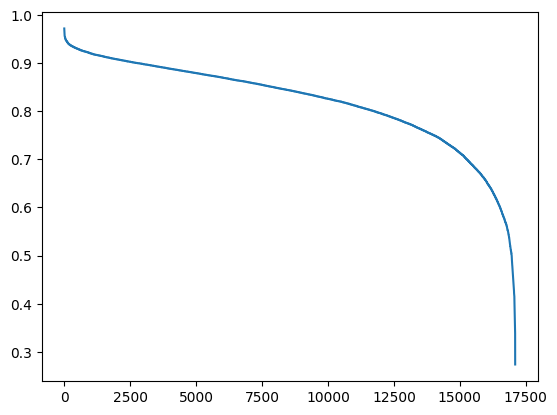

In [71]:
arr = df_clip['similarity@12'].values
arr.sort()
plt.plot(arr[::-1])

In [44]:
# q=.1
# thresholded_scores = Counter()
# for name, df_name in df_clip.groupby('name'):
#     thresh = df_name['similarity@12'].quantile(q)
#     df_q = df_name[df_name['similarity@12'] > thresh]
#     thresholded_scores[name] = df_q['similarity@12'].mean()
#     # oh right, need to recompute centroid after dropping the bad records. ugh.
# df_thresholded = pd.Series(thresholded_scores).sort_values(ascending=False)
# for i, (name, value) in enumerate(df_thresholded.items()):
#     print(f"{i}\t{value:.2f}\t{name}")

<Axes: xlabel='name'>

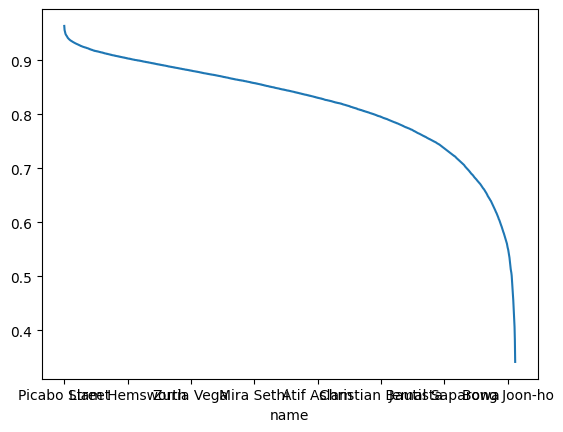

In [72]:
df_names_ranked = df_clip.groupby('name')['similarity@12'].mean().sort_values(ascending=False)
#df_names_ranked[df_names_ranked>.8]
#for rank, (name, score) in enumerate(df_names_ranked.items()):
#    print(f"{rank}\t{score}\t{name}")
df_names_ranked.plot()

In [49]:
for rank, (name, score) in enumerate(df_names_ranked.items()):
    print(f"{rank}\t{score:.3f}\t{name}")

0	0.964	Picabo Street
1	0.956	Bradley Cooper
2	0.954	Siti Badriah
3	0.951	H.E.R.
4	0.949	Toše Proeski
5	0.948	Martin Scorsese
6	0.947	Ayim Mukhamedjanova
7	0.946	Takeshi Kaneshiro
8	0.945	Diana Hayden
9	0.944	Kathem Al-Saher
10	0.943	Nikhil Advani
11	0.942	Jason Bateman
12	0.941	Ricky Schroder
13	0.940	Cicely Tyson
14	0.940	Tim Robbins
15	0.939	Diya Mirza
16	0.939	Joseph Gordon-Levitt
17	0.938	Cote de Pablo
18	0.938	Chen Daoming
19	0.937	Ronaldinho
20	0.937	Shirley MacLaine
21	0.937	Tom Hardy
22	0.936	Yalitza Aparicio
23	0.936	Hu Ge
24	0.935	Yassi Pressman
25	0.935	Ranbir Kapoor
26	0.935	Simone Manuel
27	0.934	Ayesha Takia
28	0.934	Ian Somerhalder
29	0.934	Salman Ahmad
30	0.933	Rosie Perez
31	0.933	Sandhya Mridul
32	0.933	Marilyn Monroe
33	0.932	Kirsten Dunst
34	0.932	Allu Arjun
35	0.932	Antonio Aguilar
36	0.931	Zhou Xun
37	0.931	Sebastian Castro
38	0.931	Yoo Jae-suk
39	0.931	Gauhar Khan
40	0.930	Anil Kapoor
41	0.930	Sara Ali Khan
42	0.930	Miranada Ayim
43	0.930	Meryl Streep
44	0.929	S

In [73]:
df_names_ranked.to_csv('2023-09-30_names_ranked.gpt-diversity.csv')

In [74]:
#np.array(df_embeds['embed_normed']).shape
#df_embeds.shape
classes = np.array([class_idx for class_idx in df_embeds['class_idx']])
embeds = np.array([emb.ravel() for emb in df_embeds['embed_normed']])
embeds.shape # (17100, 512)


(17100, 512)

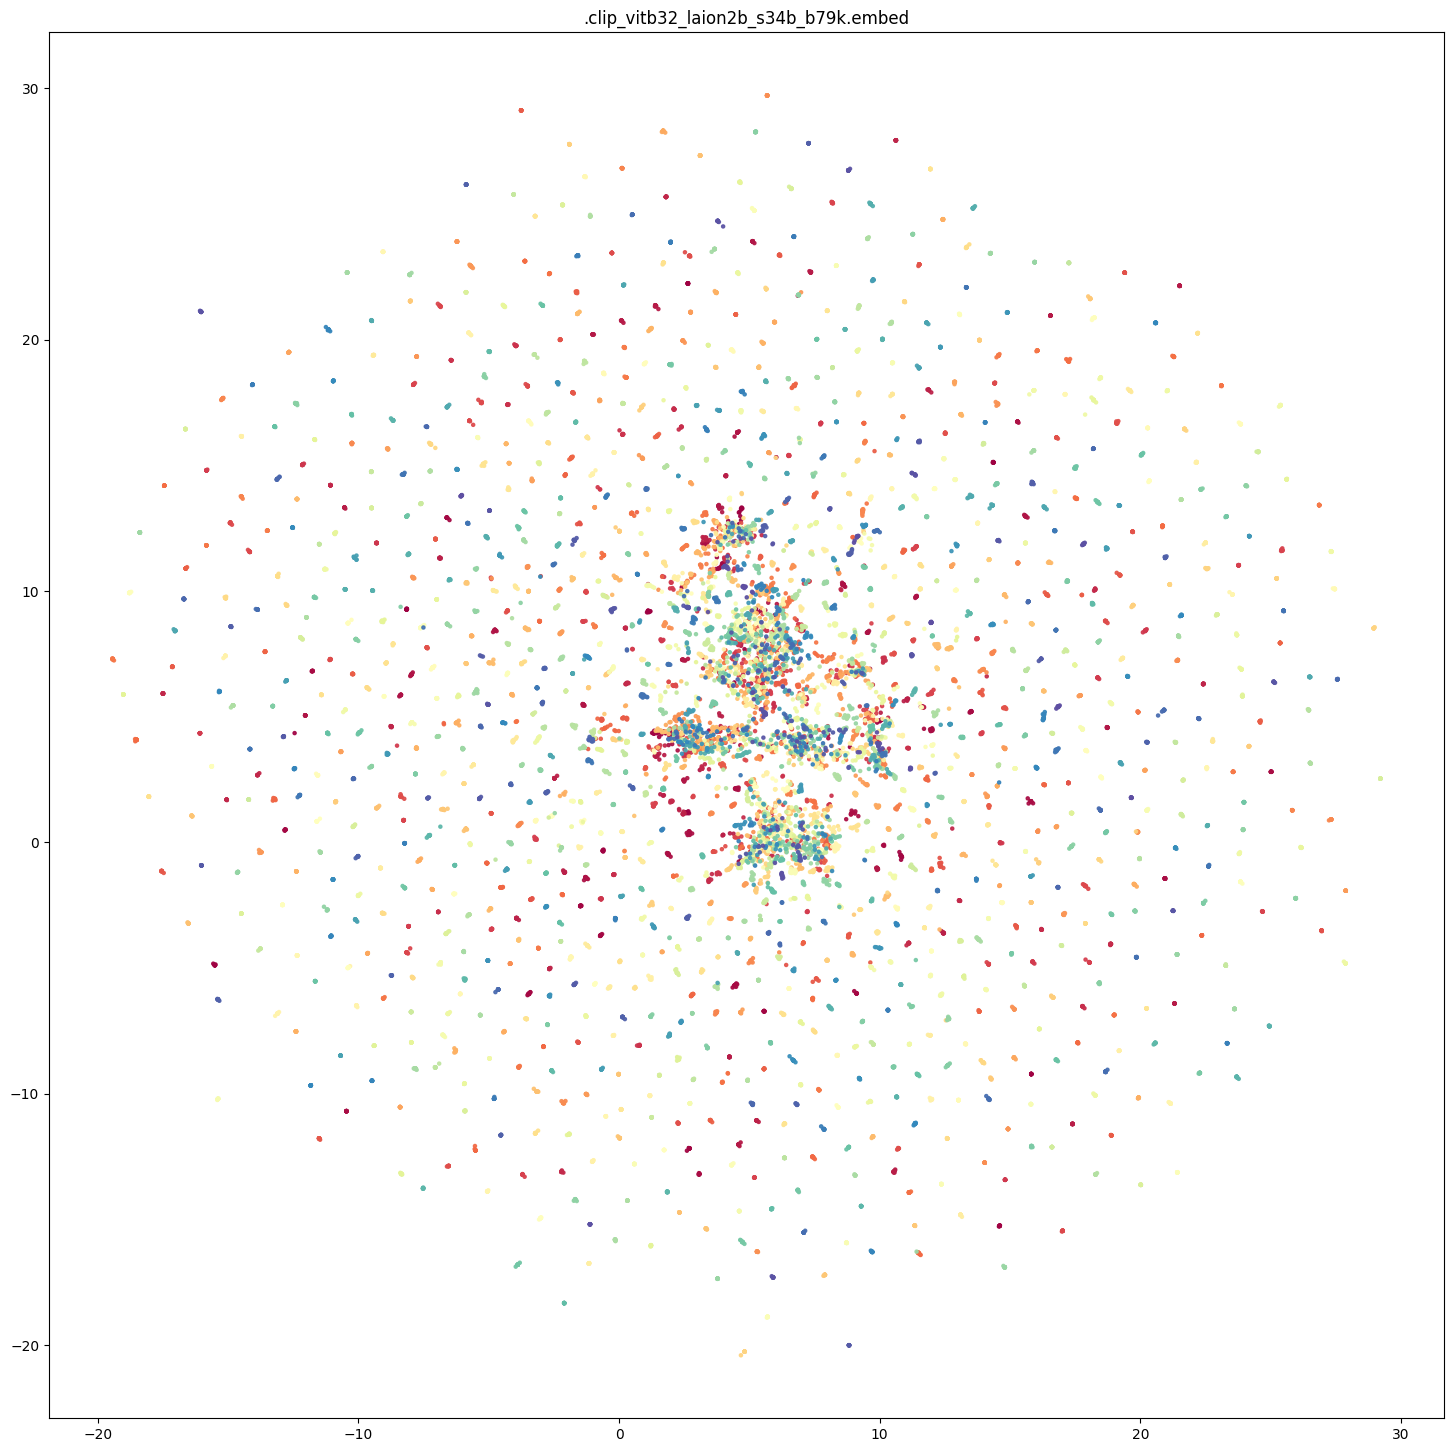

CPU times: user 7min 34s, sys: 4min 16s, total: 11min 50s
Wall time: 44 s


In [75]:
%%time

# vits

import umap

umap_model = umap.UMAP(
    n_neighbors=64, #20,
    #min_dist=.001,
    init='spectral',
    n_epochs=100,
    #local_connectivity=2,
    negative_sample_rate=20,
    repulsion_strength=1.5,
    #spread =1,
)
#umap_embeds = umap_model.fit_transform(df_embeds['embed_normed'], y=df_embeds['name'])
umap_embeds = umap_model.fit_transform(embeds, classes)

plt.scatter(
    *umap_embeds.T,
    s=5, 
    c=classes,
    cmap='Spectral',
    alpha=.9)
plt.title(f"{emb_suffix}")

fig = plt.gcf()
fig.set_size_inches(18, 18)
plt.savefig("clip-ftw.png")

plt.show()
# WAAAAAY better

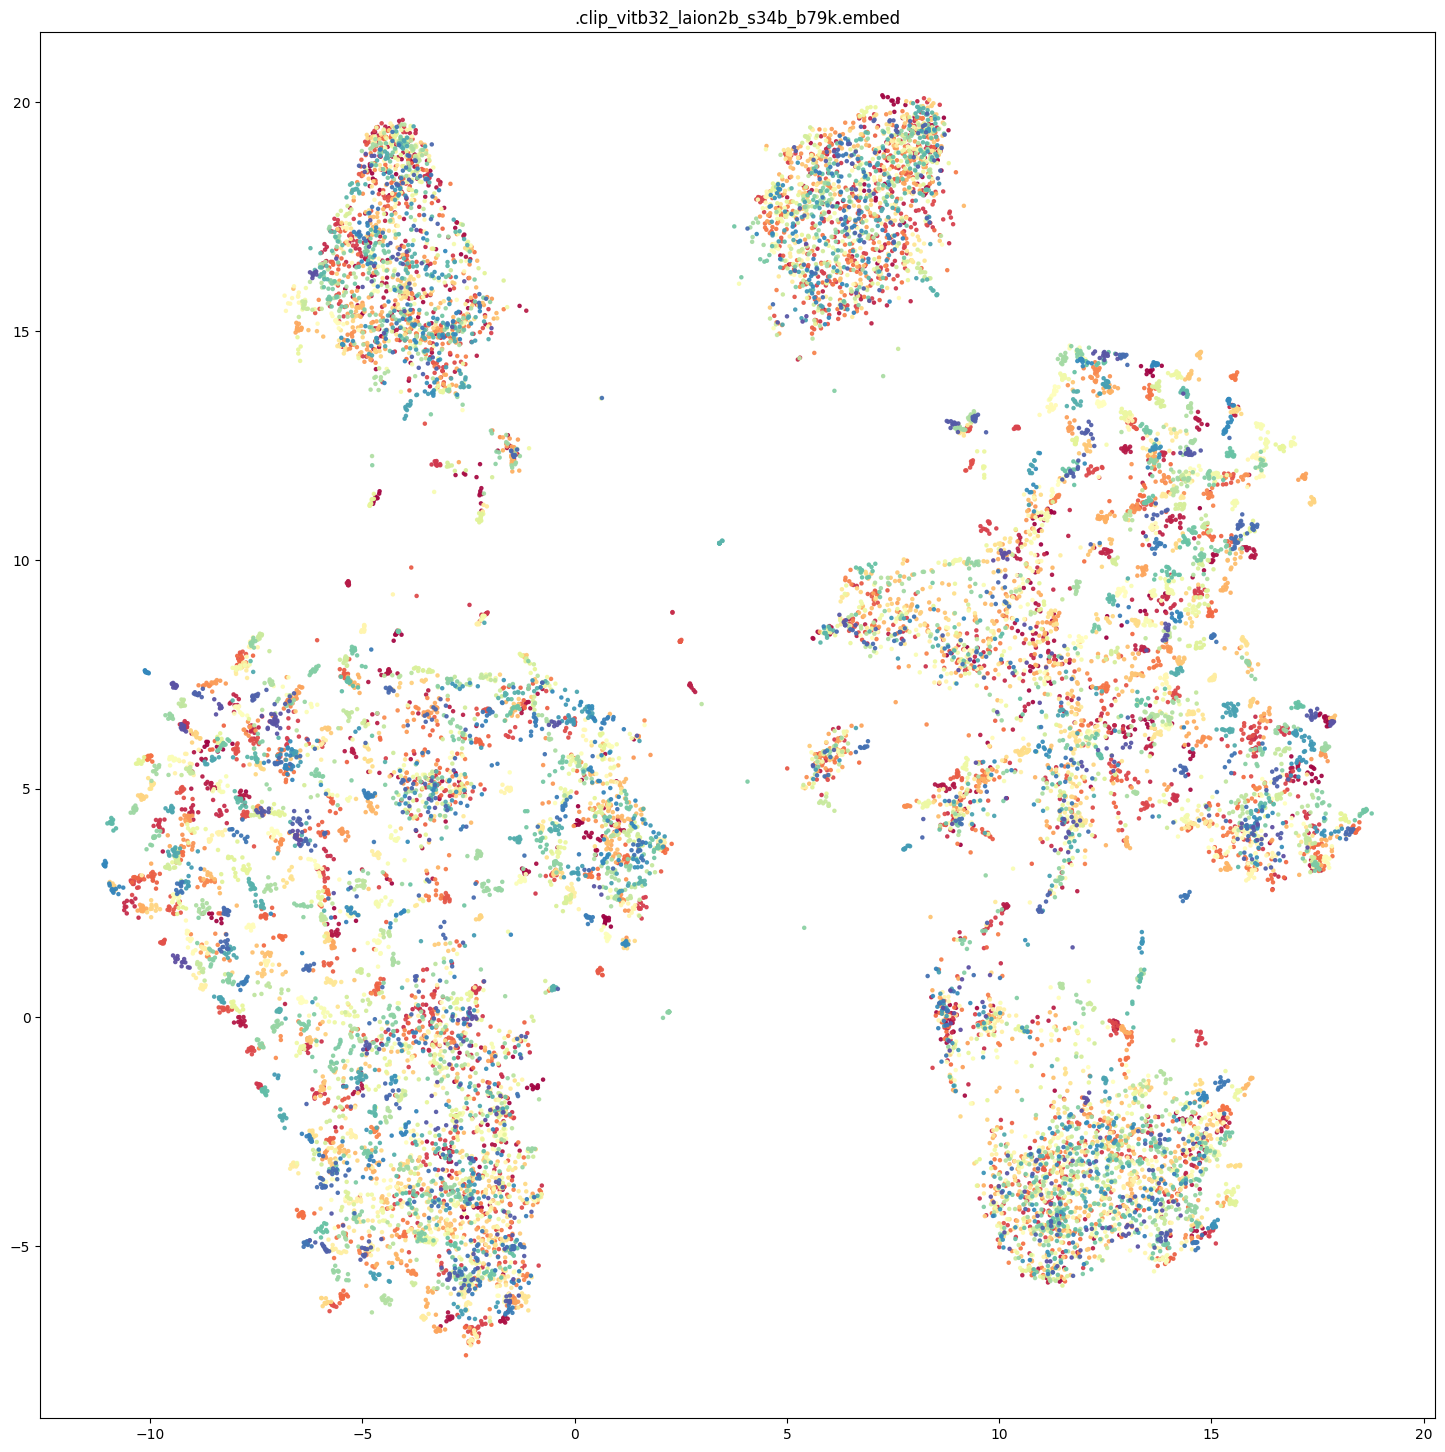

CPU times: user 9min 42s, sys: 28.8 s, total: 10min 11s
Wall time: 37.7 s


In [77]:
%%time

# vits

import umap

umap_model = umap.UMAP(
    n_neighbors=64, #20,
    #min_dist=.001,
    init='spectral',
    n_epochs=100,
    #local_connectivity=2,
    negative_sample_rate=20,
    repulsion_strength=1.5,
    #spread =1,
)
#umap_embeds = umap_model.fit_transform(df_embeds['embed_normed'], y=df_embeds['name'])
#umap_embeds = umap_model.fit_transform(embeds, classes)
umap_embeds = umap_model.fit_transform(embeds)

plt.scatter(
    *umap_embeds.T,
    s=5, 
    c=classes,
    cmap='Spectral',
    alpha=.9)
plt.title(f"{emb_suffix}")

fig = plt.gcf()
fig.set_size_inches(18, 18)
plt.savefig("umap-unsupervised_gpt-celebs.png")

plt.show()
# WAAAAAY better